# Snippet Creator and Hacking Space 

Hacking space. 

Use snippets.py (previously dm.py) or whatever for the code... 

## Provenance

* dm.ipynb renamed snippet_runner.ipynb to coordinate with snippets.py
* Moved into agg project, untracked June 28, 2022
* Created new as Learning_SLY June 23, 2022

0. Base: 12 SR conflicts
1. Reinstated UMINUS: 25SR/15RR! Rejected rule 
2. Removed percent: 25/14
3. MINUS "(" expr ")" %prec UMINUS --> MINUS expr %prec UMINUS: 25/14
4. protoexpr introduced as the first level of decoding a NUMBER, UMINUS, percent reinstated: 25/14
5. UMINUS at expression level: 25/14
6. Use same symbol but different precenence for scale and loc: 33/14?!!
7. UMINUS at proto_expression level: 25/14
8. Python style math (atom, power, factor, term, sum) (retains same symbol for LOC/SCALE): 29SR/NONE!
9. Removed percent made no difference....reinstated but made highest priority
10. Removed EXP and () 23 SR XXXX (26 with (),)
11. Removed SPECIFIED (23)
12. Removed name exposures layers builtin_sev; builtin_sev->sev and then use the sev rule (23)
13. builtin_sevs are defined by a dictionary...once looked up they are no different from regular sevs, so all special code removed... 23SR
14. EXP and () reinstated, 26 SR
15. Intrdouced sev_clause (includes sev and dsev) 29SR [if you try dfreq sev_clause you get 39SR] ...going with 39
16. Put LOW prec in reduced to 36...
17. Issue was driven by cases with optional arguments. Need to give the optional (reduce) case lower weight.


In [1]:
12

12

time: 0 ns (started: 2022-10-20 19:51:30 +01:00)


In [11]:
# see the parser - this runs without a reset
%run aggregate/parser.py

time: 156 ms (started: 2022-10-20 20:30:01 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out
Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [1]:
logger_level(30)
# run with no args this just loads libraries etc. 
%run -i snippets.py

time: 719 ms (started: 2022-10-20 20:30:12 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
# show grammar 
print(agg.grammar())

In [3]:
debug_build('--2**(-3) ---+++--100 / 25 - 8**.33 + exp(1)'), --2**(-3) ---+++--100 / 25 - 8**.33 + exp(1)

atom <-- NUMBER, 2  	
atom <-- NUMBER, 3  	
power <-- atom      	atom=3.0
factor <-- power    	power=3.0
factor <-- - factor 	factor=3.0
term <-- factor     	factor=-3.0
term <-- sum        	term=-3.0
power <-- atom EXPONENT factor	atom=2.0; factor=-3.0
factor <-- power    	power=0.125
factor <-- - factor 	factor=0.125
factor <-- - factor 	factor=-0.125
term <-- factor     	factor=0.125
term <-- sum        	term=0.125
atom <-- NUMBER, 100	
power <-- atom      	atom=100.0
factor <-- power    	power=100.0
factor <-- - factor 	factor=100.0
factor <-- - factor 	factor=-100.0
factor <-- + factor 	factor=100.0
factor <-- + factor 	factor=100.0
factor <-- + factor 	factor=100.0
factor <-- - factor 	factor=100.0
factor <-- - factor 	factor=-100.0
term <-- factor     	factor=100.0
atom <-- NUMBER, 25 	
power <-- atom      	atom=25.0
factor <-- power    	power=25.0
term <-- term / factor	term=100.0; factor=25.0
sum <-- sum - term  	sum=0.125; term=4.0
atom <-- NUMBER, 8  	
atom <-- NUMBER, .33	


({'expr': -3.142903162415027}, -3.142903162415027)

time: 16 ms (started: 2022-10-20 20:27:33 +01:00)


In [4]:
debug_build.interpreter_one('--2**(-3)')

atom <-- NUMBER, 2  	
atom <-- NUMBER, 3  	
power <-- atom      	atom=3.0
factor <-- power    	power=3.0
factor <-- - factor 	factor=3.0
term <-- factor     	factor=-3.0
term <-- sum        	term=-3.0
power <-- atom EXPONENT factor	atom=2.0; factor=-3.0
factor <-- power    	power=0.125
factor <-- - factor 	factor=0.125
factor <-- - factor 	factor=-0.125
term <-- factor     	factor=0.125
term <-- sum        	term=0.125
expr <-- sum        	sum=0.125
answer <-- expr 0.125 	expr=0.125


,type,error,name,interpreted,program,raw_input
one off,expr,0,0.125,None,--2**(-3),


time: 16 ms (started: 2022-10-20 20:27:37 +01:00)


In [10]:
build.interpreter_one('--2**(-3)')

atom <-- NUMBER, 2  	
atom <-- NUMBER, 3  	
power <-- atom      	atom=3.0
factor <-- power    	power=3.0
factor <-- - factor 	factor=3.0
term <-- factor     	factor=-3.0
term <-- sum        	term=-3.0
power <-- atom EXPONENT factor	atom=2.0; factor=-3.0
factor <-- power    	power=0.125
factor <-- - factor 	factor=0.125
factor <-- - factor 	factor=-0.125
term <-- factor     	factor=0.125
term <-- sum        	term=0.125
expr <-- sum        	sum=0.125
answer <-- expr 0.125 	expr=0.125


,type,error,name,interpreted,program,raw_input
one off,expr,0,0.125,None,--2**(-3),


time: 16 ms (started: 2022-10-20 19:52:55 +01:00)


In [14]:
debug_build

,,program
kind,name,
expr,expression,


time: 47 ms (started: 2022-10-20 18:43:11 +01:00)


In [22]:
build.debug

False

time: 0 ns (started: 2022-10-20 18:48:31 +01:00)


In [5]:
build('2 + 3', log_level=20)

27:48.918| 424|INFO      | aggregate.underwriter, interpret_program|  answer out: expr object 5.0 parsed successfully
27:48.919| 433|INFO      | aggregate.underwriter, interpret_program|  Adding 1 specs to the knowledge.
27:48.923| 439|INFO      | aggregate.underwriter, interpret_program|  Added expr, expression,  to knowledge.
27:48.924| 364|INFO      | aggregate.underwriter, write|  Underwriter.write | Program created 1 objects.
27:48.925| 549|INFO      | aggregate.underwriter, build|  Object expression of kind expr returned as a spec; no further processing.


{'expr': 5.0}

time: 0 ns (started: 2022-10-20 20:27:48 +01:00)


In [7]:
debug_build('2 + 3', log_level=30)

atom <-- NUMBER, 2  	
power <-- atom      	atom=2.0
factor <-- power    	power=2.0
term <-- factor     	factor=2.0
term <-- sum        	term=2.0
atom <-- NUMBER, 3  	
power <-- atom      	atom=3.0
factor <-- power    	power=3.0
term <-- factor     	factor=3.0
sum <-- sum + term  	sum=2.0; term=3.0
expr <-- sum        	sum=5.0
answer <-- expr 5.0 	expr=5.0


{'expr': 5.0}

time: 0 ns (started: 2022-10-20 20:27:55 +01:00)


In [1]:
logger_level(30)
# run with no args this just loads libraries etc. 
%run -i snippets.py

time: 750 ms (started: 2022-10-20 23:08:00 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [22]:
a.sevs[0].stats()

06:13.521|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
06:13.564|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
06:13.603|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->


(array(       nan), array(       nan))

time: 140 ms (started: 2022-10-20 21:06:13 +01:00)


In [23]:
a.spec

{'name': 'parsetest3',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 5.0,
 'exp_attachment': 0.0,
 'exp_limit': 10.0,
 'sev_name': 'lognorm',
 'sev_a': 1.0,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True,
 'occ_reins': None,
 'occ_kind': '',
 'freq_name': 'poisson',
 'freq_a': 0,
 'freq_b': 0,
 'agg_reins': None,
 'agg_kind': '',
 'note': ''}

time: 0 ns (started: 2022-10-20 21:06:19 +01:00)


In [30]:
welcome()

ipython startup script
Startup file      s/telos/python/common.py
Environment       smve38
Python Path       S\TELOS\Python\GREAT_project;S\TELOS\Python\cartogram_project\Python;S\TELOS\Python\meta_reddit;S\TELOS\Blog\Python;C:\Users\steve\documents\cloudstation\telos\python\aggregate_project;
Platform          Windows-10-10.0.22621-SP0
CWD               C:\Users\steve\s\TELOS\Python\aggregate_project
PID               21576
Geopandas         Installed
Logger level(s)   20 (INFO)
Custom functions  all_fonts     find_font       make_all_font_dictionary    char_in_font
                  human_stat    (r)info         now             sdir        sdirs
                  test_df       logger_level    show            welcome     WordMapper class
Custom class      UnicodeConnipitions
Magics            great figure manager, %%sf
Extensions        autoreload, autotime, figformat=retina

smfig             smfig = FigureManager(color_mode='cmap', font_size=12,
                                     

In [35]:
info(a.sevs[0].fz)

id,<class 'scipy.stats._distn_infrastructure.rv_frozen'>
a,0.000
args,()
b,inf
kwds,"{'loc': 0, 'scale': 0}"
random_state,RandomState(MT19937)


time: 15 ms (started: 2022-10-20 21:25:59 +01:00)


In [34]:
logger_level(20)
info(a.sevs[0])

id,<class 'aggregate.distr.Severity'>
a,inf
attachment,0.000
b,inf
badvalue,NaN
conditional,True
detachment,10.000
fz,<scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026FBE5C1FA0>
limit,10.000
long_name,: expon[10 xs 0]
moment_type,1


time: 16 ms (started: 2022-10-20 21:25:35 +01:00)


In [32]:
a = debug_build('agg parsetest3 5 claims 10 x 0 sev expon [1] poisson', log_level=10, update=False)

25:26.274| 320|DEBUG     | aggregate.underwriter, write|  underwriter.write | object not found, processing as a program.
25:26.275| 407|DEBUG     | aggregate.underwriter, interpret_program|  agg parsetest3 5 claims 10 x 0 sev expon  [1]  poisson
25:26.278| 424|INFO      | aggregate.underwriter, interpret_program|  answer out: agg object parsetest3 parsed successfully
25:26.278| 433|INFO      | aggregate.underwriter, interpret_program|  Adding 1 specs to the knowledge.
25:26.279| 439|INFO      | aggregate.underwriter, interpret_program|  Added agg, parsetest3, agg parsetest3 5 cla to knowledge.
25:26.280| 711|DEBUG     | aggregate.distr, __init__|  Aggregate.__init__ | creating new Aggregate parsetest3
25:26.281|  99|DEBUG     | aggregate.distr, __init__|  Frequency.__init__ | creating new Frequency poisson at <aggregate.distr.Aggregate object at 0x0000026FBEA02AC0>
25:26.284| 790|DEBUG     | aggregate.distr, __init__|  Aggregate.__init__ | Broadcast/align: exposures + severity = 1 exp 

name <-- ID = parsetest3	
atom <-- NUMBER, 5  	
power <-- atom      	atom=5.0
factor <-- power    	power=5.0
term <-- factor     	factor=5.0
term <-- sum        	term=5.0
expr <-- sum        	sum=5.0
numbers <-- expr    	expr=5.0
exposures <-- numbers CLAIMS	numbers=5.0
atom <-- NUMBER, 10 	
power <-- atom      	atom=10.0
factor <-- power    	power=10.0
term <-- factor     	factor=10.0
term <-- sum        	term=10.0
expr <-- sum        	sum=10.0
numbers <-- expr    	expr=10.0
atom <-- NUMBER, 0  	
power <-- atom      	atom=0.0
factor <-- power    	power=0.0
term <-- factor     	factor=0.0
term <-- sum        	term=0.0
expr <-- sum        	sum=0.0
numbers <-- expr    	expr=0.0
layers <-- numbers XS numbers	numbers0=10.0; numbers1=0.0
ids <-- ID (expon)  	
atom <-- NUMBER, 1  	
power <-- atom      	atom=1.0
factor <-- power    	power=1.0
term <-- factor     	factor=1.0
term <-- sum        	term=1.0
expr <-- sum        	sum=1.0
numberl <-- expr    	expr=1.0
numbers <-- [numberl]	numberl=[

In [33]:
a.statistics.loc['agg']

name,parsetest3
measure,
ex1,NaN
ex2,NaN
ex3,NaN
mean,NaN
cv,NaN
skew,NaN


time: 16 ms (started: 2022-10-20 21:25:31 +01:00)


In [10]:
a.recommend_bucket(verbose=True)

Recommended bucket size with 1024 buckets: 0
Recommended bucket size with 8192 buckets: 0
Recommended bucket size with 65536 buckets: 0


0.0

time: 0 ns (started: 2022-10-20 20:38:18 +01:00)


In [48]:
a = debug_build('agg parsetest3 5 claims  sev  norm 10 poisson', log_level=21, update=False)
a

46:30.280|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
46:30.282|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting norm EX^1 integral for convergence reasons
46:30.362|3020|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^1 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
46:30.362|3023|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 1] split EX^1 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
46:30.410|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->


name <-- ID = parsetest3	
atom <-- NUMBER, 5  	
power <-- atom      	atom=5.0
factor <-- power    	power=5.0
term <-- factor     	factor=5.0
term <-- sum        	term=5.0
expr <-- sum        	sum=5.0
numbers <-- expr    	expr=5.0
exposures <-- numbers CLAIMS	numbers=5.0
layers <-- missing layer term	
ids <-- ID (norm)   	
atom <-- NUMBER, 10 	
power <-- atom      	atom=10.0
factor <-- power    	power=10.0
term <-- factor     	factor=10.0
term <-- sum        	term=10.0
expr <-- sum        	sum=10.0
numbers <-- expr    	expr=10.0
weights <-- missing weights term	
sev <-- ids numbers weights	ids=norm; numbers=10.0; weights=1
occ_reins <-- missing occ reins	
freq <-- FREQ poisson (zero param distribution)	
agg_reins <-- missing agg reins	
note <-- missing note term	
agg_out <-- AGG name exposures layers SEV sev occ_reins freq agg_reins note	name=parsetest3; exposures={'exp_en': 5.0}; layers={}; sev_clause={'sev_name': 'norm', 'sev_a': 10.0, 'sev_wt': 1}; occ_reins={}; freq={'freq_name': 'p

46:30.411|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting norm EX^2 integral for convergence reasons
46:30.500|3020|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^2 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
46:30.501|3023|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 1] split EX^2 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
46:30.547|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
46:30.548|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting norm EX^3 integral for convergence reasons
46:30.640|3020|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral ret

,E(X),CV(X),Skew(X)
X,,,
Sev,,,
Freq,5.000,447.214m,447.214m
Agg,,,


time: 437 ms (started: 2022-10-20 22:46:30 +01:00)


In [2]:
a = debug_build('agg parsetest3 5 claims  sev  lognorm 2 poisson', log_level=21, update=False)
a

08:16.691|3021|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
08:16.691|3026|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^1 integral for convergence reasons
08:16.762|3032|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^1 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
08:16.762|3035|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 1] split EX^1 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
08:16.808|3021|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
08:16.809|3026|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^2 integral for convergence rea

name <-- ID = parsetest3	
atom <-- NUMBER, 5  	
power <-- atom      	atom=5.0
factor <-- power    	power=5.0
term <-- factor     	factor=5.0
term <-- sum        	term=5.0
expr <-- sum        	sum=5.0
numbers <-- expr    	expr=5.0
exposures <-- numbers CLAIMS	numbers=5.0
layers <-- missing layer term	
ids <-- ID (lognorm)	
atom <-- NUMBER, 2  	
power <-- atom      	atom=2.0
factor <-- power    	power=2.0
term <-- factor     	factor=2.0
term <-- sum        	term=2.0
expr <-- sum        	sum=2.0
numbers <-- expr    	expr=2.0
weights <-- missing weights term	
sev <-- ids numbers weights	ids=lognorm; numbers=2.0; weights=1
occ_reins <-- missing occ reins	
freq <-- FREQ poisson (zero param distribution)	
agg_reins <-- missing agg reins	
note <-- missing note term	
agg_out <-- AGG name exposures layers SEV sev occ_reins freq agg_reins note	name=parsetest3; exposures={'exp_en': 5.0}; layers={}; sev_clause={'sev_name': 'lognorm', 'sev_a': 2.0, 'sev_wt': 1}; occ_reins={}; freq={'freq_name': 'poi

08:16.886|3032|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^2 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
08:16.887|3035|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 1] split EX^2 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error may be    underestimated.
08:16.926|3021|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
08:16.927|3026|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
08:17.017|3032|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The occurrence of roundoff error is detected, which prevents    the requested tolerance from being achieved.  The error m

,E(X),CV(X),Skew(X)
X,,,
Sev,,,
Freq,5.000,447.214m,447.214m
Agg,,,


time: 390 ms (started: 2022-10-20 23:08:16 +01:00)


In [4]:
from aggregate import Severity

time: 0 ns (started: 2022-10-20 23:09:50 +01:00)


In [7]:
a.spec

{'name': 'parsetest3',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 5.0,
 'exp_attachment': 0,
 'exp_limit': inf,
 'sev_name': 'lognorm',
 'sev_a': 2.0,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True,
 'occ_reins': None,
 'occ_kind': '',
 'freq_name': 'poisson',
 'freq_a': 0,
 'freq_b': 0,
 'agg_reins': None,
 'agg_kind': '',
 'note': ''}

time: 0 ns (started: 2022-10-20 23:10:30 +01:00)


In [16]:
   # sev_name,
   #  exp_attachment=0,
   #  exp_limit=inf,
   #  sev_mean=0,
   #  sev_cv=0,
   #  sev_a=0,
   #  sev_b=0,
   #  sev_loc=0,
   #  sev_scale=0,
   #  sev_xs=None,
   #  sev_ps=None,
   #  sev_wt=1,
   #  sev_conditional=True,
s = Severity(sev_name='lognorm', **{'exp_attachment': 0,
 'exp_limit': 100,
 'sev_a': 2.0,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True})

time: 0 ns (started: 2022-10-21 07:40:13 +01:00)


In [17]:
s.stats()

40:14.294|3021|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
40:14.357|3021|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->
40:14.401|3021|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=nan, message no message ->


(array(       nan), array(       nan))

time: 156 ms (started: 2022-10-21 07:40:14 +01:00)


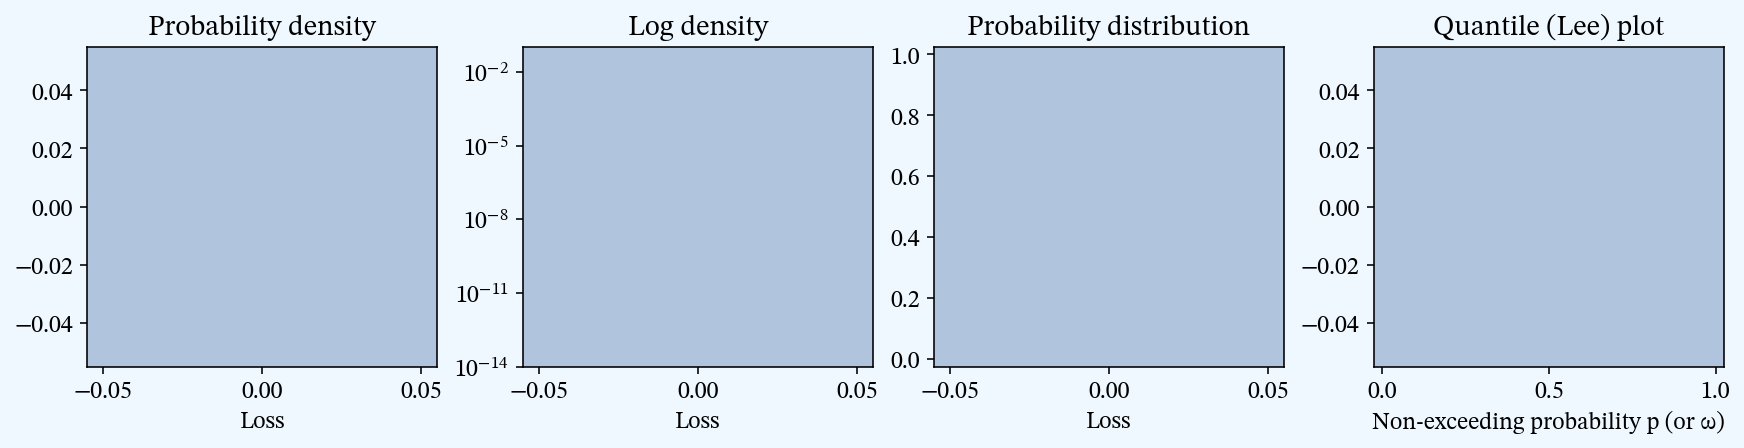

time: 828 ms (started: 2022-10-20 23:11:37 +01:00)


In [12]:
s.plot()

In [3]:
a.spec

{'name': 'parsetest3',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 5.0,
 'exp_attachment': 0,
 'exp_limit': inf,
 'sev_name': 'lognorm',
 'sev_a': 2.0,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0,
 'sev_xs': None,
 'sev_ps': None,
 'sev_wt': 1,
 'sev_conditional': True,
 'occ_reins': None,
 'occ_kind': '',
 'freq_name': 'poisson',
 'freq_a': 0,
 'freq_b': 0,
 'agg_reins': None,
 'agg_kind': '',
 'note': ''}

time: 0 ns (started: 2022-10-20 23:08:38 +01:00)


In [46]:
a = debug_build('agg parsetest3 5 claims  sev  lognorm 2 cv .3 poisson', log_level=21, update=False)
a

45:54.942| 599|WARNING   | aggregate.underwriter, build|  Unexpected: output kind is <class 'aggregate.distr.Aggregate'>. (expr/number?)


name <-- ID = parsetest3	
atom <-- NUMBER, 5  	
power <-- atom      	atom=5.0
factor <-- power    	power=5.0
term <-- factor     	factor=5.0
term <-- sum        	term=5.0
expr <-- sum        	sum=5.0
numbers <-- expr    	expr=5.0
exposures <-- numbers CLAIMS	numbers=5.0
layers <-- missing layer term	
ids <-- ID (lognorm)	
atom <-- NUMBER, 2  	
power <-- atom      	atom=2.0
factor <-- power    	power=2.0
term <-- factor     	factor=2.0
term <-- sum        	term=2.0
expr <-- sum        	sum=2.0
numbers <-- expr    	expr=2.0
atom <-- NUMBER, .3 	
power <-- atom      	atom=0.3
factor <-- power    	power=0.3
term <-- factor     	factor=0.3
term <-- sum        	term=0.3
expr <-- sum        	sum=0.3
numbers <-- expr    	expr=0.3
weights <-- missing weights term	
sev <-- ids numbers CV numbers weights	ids=lognorm; numbers0=2.0; numbers1=0.3; weights=1
occ_reins <-- missing occ reins	
freq <-- FREQ poisson (zero param distribution)	
agg_reins <-- missing agg reins	
note <-- missing note term	
a

,E(X),CV(X),Skew(X)
X,,,
Sev,2.000,300.000m,927.000m
Freq,5.000,447.214m,447.214m
Agg,10.000,466.905m,508.926m


time: 172 ms (started: 2022-10-20 22:45:54 +01:00)


In [37]:
debug_build('agg parsetest3 5 claims  sev  beta 2 3 poisson', log_level=21)

28:04.789| 421|ERROR     | aggregate.underwriter, interpret_program|  Parse error in input "agg parsetest3 5 claims  sev  beta 2 >>>3  poisson"
Value 3 of type NUMBER not expected


name <-- ID = parsetest3	
atom <-- NUMBER, 5  	
power <-- atom      	atom=5.0
factor <-- power    	power=5.0
term <-- factor     	factor=5.0
term <-- sum        	term=5.0
expr <-- sum        	sum=5.0
numbers <-- expr    	expr=5.0
exposures <-- numbers CLAIMS	numbers=5.0
layers <-- missing layer term	
ids <-- ID (beta)   	
atom <-- NUMBER, 2  	
power <-- atom      	atom=2.0
factor <-- power    	power=2.0
term <-- factor     	factor=2.0
term <-- sum        	term=2.0
expr <-- sum        	sum=2.0
numbers <-- expr    	expr=2.0
weights <-- missing weights term	
sev <-- ids numbers weights	ids=beta; numbers=2.0; weights=1


ValueError: Token(type='NUMBER', value='3', lineno=1, index=37)

time: 31 ms (started: 2022-10-20 21:28:04 +01:00)


In [36]:
debug_build('agg Sev12 1 claim 130 x 20 sev lognorm 20 cv 0.75 fixed')

name <-- ID = parsetest3	
atom <-- NUMBER, 5  	
power <-- atom      	atom=5.0
factor <-- power    	power=5.0
term <-- factor     	factor=5.0
term <-- sum        	term=5.0
expr <-- sum        	sum=5.0
numbers <-- expr    	expr=5.0
exposures <-- numbers CLAIMS	numbers=5.0
layers <-- missing layer term	
ids <-- ID (lognorm)	
atom <-- NUMBER, 2  	
power <-- atom      	atom=2.0
factor <-- power    	power=2.0
term <-- factor     	factor=2.0
term <-- sum        	term=2.0
expr <-- sum        	sum=2.0
numbers <-- expr    	expr=2.0
atom <-- NUMBER, .3 	
power <-- atom      	atom=0.3
factor <-- power    	power=0.3
term <-- factor     	factor=0.3
term <-- sum        	term=0.3
expr <-- sum        	sum=0.3
numbers <-- expr    	expr=0.3
weights <-- missing weights term	
sev <-- ids numbers CV numbers weights	ids=lognorm; numbers0=2.0; numbers1=0.3; weights=1
occ_reins <-- missing occ reins	
freq <-- FREQ poisson (zero param distribution)	
agg_reins <-- missing agg reins	
note <-- missing note term	
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,14.140,14.140,-220.003n,1.112,1.112,563.458n,2.568
Freq,1.000,,,0.000,,,
Agg,14.140,14.140,-220.003n,1.112,1.112,563.458n,2.568


time: 312 ms (started: 2022-10-20 21:27:20 +01:00)


In [146]:
build('agg FreqEmpirical0 dfreq [0 1 2] [0.5 .3 .2] sev sev.One')

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,0.000,0.000,0.000,,
Freq,700.000m,,,1.116,,,579.314m
Agg,700.000m,700.000m,-111.022a,1.116,1.116,-444.089a,579.314m


time: 32 ms (started: 2022-10-20 15:11:03 +01:00)


In [24]:
logger_level(30)
%run -i snippets.py parse_test_1 

15:38.616| 402|ERROR     | aggregate.parser, freq|  Illogical choice for FREQ binomial, should be poisson, bernoulli, geometric, or fixed.
15:38.622| 402|ERROR     | aggregate.parser, freq|  Illogical choice for FREQ pascal, should be poisson, bernoulli, geometric, or fixed.


ACTIVATING parse_test_1 SECTION __main__ ===========================
ERRORS


,type,error,name,interpreted,program,raw_input
simple4,agg,1,simple4,"Token(type='DSEV', value='dsev', lineno=1, index=44)",agg Simple4 dfreq [1 2 3] [0.5 1/4 1/4] dsev [1 2 10] [.4 .4 .2] not...,
parsetest3,agg,1,parsetest3,"Token(type='ID', value='lognorm', lineno=1, index=39)",agg parsetest3 5 claims sev 1.2343e2 * lognorm 2 - 6 ! poisson,
FreqEmpirical0,agg,1,FreqEmpirical0,"Token(type='SEV', value='sev', lineno=1, index=49)",agg FreqEmpirical0 dfreq [0 1 2] [0.5 .3 .2] sev sev.One,
FreqEmpirical1,agg,1,FreqEmpirical1,"Token(type='SEV', value='sev', lineno=1, index=49)",agg FreqEmpirical1 dfreq [0 1 2] [0.5 .3 .2] sev lognorm 10 cv .3,
FreqEmpirical2,agg,1,FreqEmpirical2,"Token(type='[', value='[', lineno=1, index=50)",agg FreqEmpirical2 dfreq [0 1 2] [0.5 .3 .2] [10 10] xs [0 20] sev l...,
FreqBinomial,agg,1,FreqBinomial,"Token(type='NUMBER', value='0.5', lineno=1, index=48)",agg FreqBinomial 10 claims sev sev.One binomial 0.5,
FreqPascal,agg,1,FreqPascal,"Token(type='NUMBER', value='.8', lineno=1, index=44)",agg FreqPascal 10 claims sev sev.One pascal .8 3,
FreqDelaporte,agg,1,FreqDelaporte,"Token(type='NUMBER', value='.25', lineno=1, index=60)",agg FreqDelaporte 10 claims sev sev.One mixed delaporte .65 .25,
FreqIG,agg,1,FreqIG,"Token(type='NUMBER', value='0.4', lineno=1, index=47)",agg FreqIG 10 claims sev sev.One mixed sig 0.5 0.4,
FreqSichel.gamma,agg,1,FreqSichel.gamma,"Token(type='NUMBER', value='.25', lineno=1, index=66)",agg FreqSichel.gamma 10 claims sev sev.One mixed sichel.gamma .65 .25,


PASSES


,type,error,name,interpreted,program,raw_input
math0,expr,0,-1.0,None,-1,
math1,expr,0,1.24e-05,None,1.24E-05,
math2,expr,0,123000.0,None,1.23E+05,
math3,expr,0,-1.23,None,-1.23E+00,
math4,expr,0,0.766,None,0.766,
math5,expr,0,1000000.0,None,1.00E+06,
simple1,agg,0,Simple1,"{'name': 'Simple1', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [1....",agg Simple1 dfreq [1] dsev [0 1] note{toss of a single coin},
simple2,agg,0,Simple2,"{'name': 'Simple2', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': [1...",agg Simple2 dfreq [12] dsev [0 1] note{toss of 12 single coins},
simple3,agg,0,Simple3,"{'name': 'Simple3', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], 'fr...",agg Simple3 dfreq [1 2 3] dsev [1 2 10] note{RMI 3388-like example},
simple5,agg,0,Simple5,"{'name': 'Simple5', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0, 4.0,...",agg Simple5 dfreq [1 2 3 4 5 6] dsev [1 2 3 4 5 6] note{sum of a roll of...,


time: 250 ms (started: 2022-10-20 21:15:38 +01:00)


In [ ]:
logger_level(30)
%run -i snippets.py parse_test_2

In [4]:
df0[['program', 'log2', 'bs', 
                'agg_m', 
                'emp_m', 
                'agg_cv', 
                'emp_cv', 
                'agg_sd',
                'emp_sd']]

,program,log2,bs,agg_m,emp_m,agg_cv,emp_cv,agg_sd,emp_sd
simple1,agg Simple1 dfreq [1] dsev [0 1] note{toss of a single coin},2,1.000,500.000m,500.000m,1.000,1.000,500.000m,
simple2,agg Simple2 dfreq [12] dsev [0 1] note{toss of 12 single coins},5,1.000,6.000,6.000,288.675m,288.675m,1.732,
simple3,agg Simple3 dfreq [1 2 3] dsev [1 2 10] note{RMI 3388-like example},6,1.000,8.667,8.667,773.705m,773.705m,6.705,
simple4,agg Simple4 dfreq [1 2 3] [0.5 1/4 1/4] dsev [1 2 10] [.4 .4 .2] not...,6,1.000,5.600,5.600,938.477m,938.477m,5.255,
simple5,agg Simple5 dfreq [1 2 3 4 5 6] dsev [1 2 3 4 5 6] note{sum of a roll of...,7,1.000,12.250,12.250,553.283m,553.283m,6.778,
parsetest1,agg parsetest1 5 claims sev gamma 13.9 cv .5 poisson,13,31.250m,69.500,69.491,500.000m,499.823m,34.750,
parsetest2,agg parsetest2 5 claims sev gamma 9.8 cv .5 + 3 occurrence net of 1 po 3 x...,13,31.250m,64.000,59.007,478.862m,484.189m,30.647,
parsetest3,agg parsetest3 5 claims sev 1.2343e2 * lognorm 2 - 6 ! poisson,13,20.000,4.560k,4.299k,3.304,2.034,15.069k,
parsetest4,agg parsetest4 10 claims 10 x 5 sev [8/3 3/2] * lognorm 3 cv 1 + 4 ! mixed...,13,62.500m,83.539,83.538,576.429m,576.414m,48.154,
parsetest5,agg parsetest5 1000 prem at .5 lr sev lognorm 3 cv [.2 .35 .5] wts=3 mixed...,13,250.000m,500.000,499.829,506.779m,506.138m,253.390,


time: 110 ms (started: 2022-10-19 22:08:47 +01:00)


In [7]:
logger_level(30)
build('agg ONE dfreq [1 3] dsev [3 4]')

name <-- ID = ONE
	ID=Token(type='ID', value='ONE', lineno=1, index=4)

expr <-- NUMBER, 1
	NUMBER=Token(type='NUMBER', value='1', lineno=1, index=16)

numberl <-- expr
	expr=1.0 (type: expr)

expr <-- NUMBER, 3
	NUMBER=Token(type='NUMBER', value='3', lineno=1, index=18)

numberl <-- numberl expr (adding 3.0 to list [1.0])
	numberl=[1.0] (type: numberl); expr=3.0 (type: expr)

doutcomes <-- [numberl]
	[=Token(type='[', value='[', lineno=1, index=15); numberl=[1.0, 3.0] (type: numberl); ]=Token(type=']', value=']', lineno=1, index=19)

dprobs <-- missing dprobs term
	

dfreq <-- DFREQ doutcomes dprobs
	DFREQ=Token(type='DFREQ', value='dfreq', lineno=1, index=8); doutcomes=[         1          3] (type: doutcomes); dprobs=[] (type: dprobs)

layers <-- missing layer term
	

expr <-- NUMBER, 3
	NUMBER=Token(type='NUMBER', value='3', lineno=1, index=29)

numberl <-- expr
	expr=3.0 (type: expr)

expr <-- NUMBER, 4
	NUMBER=Token(type='NUMBER', value='4', lineno=1, index=31)

numberl <-- numbe

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,142.857m,142.857m,0.000,0.000
Freq,2.000,,,500.000m,,,0.000
Agg,7.000,7.000,0.000,510.102m,510.102m,1.332f,57.659m


time: 31 ms (started: 2022-10-18 22:54:40 +01:00)


In [9]:
logger_level(35)
%run -i snippets.py parse_test_2

ACTIVATING parse_test_2 SECTION __main__ ===========================
MUst run parse_test_1 first to create df
simple1
simple2
simple3
simple4
simple5
parsetest1
parsetest2


34:27.316|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=45415479.69774395, message no message ->
34:27.316|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^2 integral for convergence reasons
34:28.164|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=inf, message no message ->
34:28.164|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
34:28.657|3020|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  P

parsetest3
parsetest4


34:29.267|1077|WARNING   | aggregate.distr, update_work|  Aggregate.update | warning, claim count 166.66666647817394 is high; consider an approximation 


parsetest5


34:29.789|1077|WARNING   | aggregate.distr, update_work|  Aggregate.update | warning, claim count 166.66666647817394 is high; consider an approximation 


parsetest6
parsetest7
parsetest8: exception inf not implemented
FreqFixed
FreqEmpirical0


34:30.630| 838|ERROR     | aggregate.utils, static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -30.214976290024396; ex=10.886337145836062, ex2=88.29736016278567
34:30.634| 838|ERROR     | aggregate.utils, static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -30.214976290024396; ex=10.886337145836062, ex2=88.29736016278567


FreqEmpirical1
FreqEmpirical2


34:31.181|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=297.0946490663219, message no message ->
34:31.656|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=7933.1015059232195, message no message ->


FreqEmpirical3
FreqEmpirical4
FreqEmpirical5
FreqEmpirical6
FreqPoisson
FreqBernoulli
FreqBinomial
FreqGeometric
FreqPascal
FreqNegBin
FreqDelaporte
FreqIG
FreqSichel
FreqSichel.gamma
FreqSichel.ig
FreqBeta
Sev0
Sev1
Sev2
Sev3
Sev4
Sev5
Sev6
Sev7
Sev8


34:43.879|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=-15624.999584577263, message no message ->
34:43.880|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting pareto EX^3 integral for convergence reasons


Sev9


34:44.092|3020|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The integral is probably divergent, or slowly convergent.


Sev10
Sev11
Sev12
Sev13
Sev14
Sev15
Sev16
Sev17
Sev18
Sev19
Sev20
Example1
Example2
Example3
Example4
Example5
Example6
Example7
Example8
Example9
Tweedie0
Tweedie1
Tweedie2
Tweedie3
Tweedie4
Tweedie5
Tweedie6
Tweedie7


34:51.527|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=0.0005000014560128021, message no message ->
34:51.528|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting gamma EX^1 integral for convergence reasons
34:51.613|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=4.9999970722427984e-05, message no message ->
34:51.614|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting gamma EX^2 integral for convergence reasons
34:51.701|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=9.975203542988572e-06, message no message ->
34:51.703|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting gamma EX^3 integral for convergence reasons


Tweedie8


34:51.765|3023|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 1] split EX^3 integral returned The integral is probably divergent, or slowly convergent.
34:51.782|1077|WARNING   | aggregate.distr, update_work|  Aggregate.update | warning, claim count 2000.0 is high; consider an approximation 


Tweedie9
ExampleGup
ExampleRet
ExampleXoL
ExampleXoLUC
Example2Gup
Example2Ret
Example2XoL
Example2XoLUC
MixedLine1
MixedLine3
MixedLine4
MixedLine5
MixedLine6
MixedLine7
LimitProfile1
LimitProfile2
LimitProfile3
LimitProfile4
LimitProfile5
LimitProfile6
LimitProfile7
LimitProfile8
CA
FL
NY
Blend0
Blend1
Blend2
Blend3
logo1
logo2
dHist1
cHist1
dHist2
dHist3
dHist4
BodoffWind
BodoffQuake
Bodoff2Wind
Bodoff2Quake
Bodoff3Wind
Bodoff3Quake
Comment1
Comment2
Reins1
Reins2
Reins3


35:09.166|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=3383.442206024155, message no message ->
35:09.166|3014|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | splitting dhistogram EX^2 integral for convergence reasons
35:09.718|3023|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | [ϵ, 1] split EX^2 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the integrand in order to determine the difficulties.  If the position of a    local difficulty can be determined (singularity, discontinuity) one will    probably gain from splitting up the interval and calling the integrator    on the subranges.  Perhaps a special-purpose integrator should be used.
35:10.208|3009|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=254898.7555402778, message no message ->
35:10.209|3014|WARNING   | aggregate.distr, safe_integrate|  Severi

Reins4


,program,log2,bs,agg_m,agg_cv,agg_sd,emp_m,emp_cv,emp_sd
math0,-1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
math1,1.24E-05,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
math2,1.23E+05,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
math3,-1.23E+00,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
math4,0.766,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
math5,1.00E+06,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
simple1,agg Simple1 dfreq [1] dsev [0 1] note{toss of a single coin},2,1.000,500.000m,1.000,500.000m,500.000m,1.000,
simple2,agg Simple2 dfreq [12] dsev [0 1] note{toss of 12 single coins},5,1.000,6.000,288.675m,1.732,6.000,288.675m,
simple3,agg Simple3 dfreq [1 2 3] dsev [1 2 10] note{RMI 3388-like example},6,1.000,8.667,773.705m,6.705,8.667,773.705m,
simple4,agg Simple4 dfreq [1 2 3] [0.5 1/4 1/4] dsev [1 2 10] [.4 .4 .2] not...,6,1.000,5.600,938.477m,5.255,5.600,938.477m,


time: 44.4 s (started: 2022-10-18 22:34:26 +01:00)


# Reinsurance

In [26]:
logger_level(10)
%run -i snippets.py reinsurance

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.999,5.463,-453.641m,747.959m,668.367m,-106.413m,2.562
Freq,5.000,,,447.214m,,,447.214m
Agg,49.993,27.314,-453.641m,558.470m,537.906m,-36.822m,861.234m


ceded                                          \
                                 ex       var        sd        cv      skew   
kind share limit   attach                                                     
occ  2.5    5.000  0.0        2.325  153.032m  391.193m  168.239m    -2.387   
     5.0    15.000 5.0        1.556     2.680     1.637     1.052  905.372m   
     30.0   30.000 20.0    668.923m     9.823     3.134     4.685     6.266   
     all   inf     gup        4.550    18.041     4.248  933.510m     4.144   

                             net                                 subject  \
                              ex     var     sd        cv   skew      ex   
kind share limit   attach                                                  
occ  2.5    5.000  0.0     7.677  53.550  7.318  953.194m  2.721   9.999   
     5.0    15.000 5.0     8.453  36.573  6.048  715.421m  3.472   9.999   
     30.0   30.000 20.0    9.330  29.652  5.445  583.663m  1.041   9.999   
     all   inf     gup     5.463  13.331  3.651  668.367m  1.688   9.999   

                                                           
                              var     sd        cv   skew  
kind share limit   attach                                  
occ  2.5    5.000  0.0     55.928  7.479  747.960m  2.562  
     5.0    15.000 5.0     55.928  7.479  747.960m  2.562  
     30.0   30.000 20.0    55.928  7.479  747.960m  2.562  
     all   inf     gup     55.928  7.479  747.960m  2.562

Occurrence only
Reinsurance: net of 2.50 part of 5.00 xs 0.00 and 5.00 part of 15.00 xs 5.00 and 30.00 xs 20.00 per occurrence


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.999,9.999,-6.894n,747.959m,747.960m,746.283n,2.562
Freq,5.000,,,447.214m,,,447.214m
Agg,49.993,12.651,-746.938m,558.470m,514.201m,-79.269m,861.234m


ceded                                       \
                                 ex      var      sd        cv      skew   
kind share limit   attach                                                  
agg  12.5   25.000 0.0        4.809    8.980   2.997  623.095m     1.051   
     75.0   75.000 25.0    394.908m    7.827   2.798     7.085    11.519   
     all   inf     gup       37.344  580.028  24.084  644.913m  530.490m   

                              net                                 subject  \
                               ex     var     sd        cv   skew      ex   
kind share limit   attach                                                   
agg  12.5   25.000 0.0      5.204  22.882  4.783  919.155m  4.723   9.999   
     75.0   75.000 25.0     9.604  35.940  5.995  624.246m  1.052   9.999   
     all   inf     gup     12.651  42.319  6.505  514.201m  6.534  49.992   

                                                                
                               var      sd        cv      skew  
kind share limit   attach                                       
agg  12.5   25.000 0.0      55.928   7.479  747.960m     2.562  
     75.0   75.000 25.0     55.928   7.479  747.960m     2.562  
     all   inf     gup     779.311  27.916  558.416m  859.639m

Aggregate only
Reinsurance: net of 12.50 part of 25.00 xs 0.00 and 75.00 xs 25.00 in the aggregate.


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.999,5.463,-453.641m,747.959m,668.367m,-106.413m,2.562
Freq,5.000,,,447.214m,,,447.214m
Agg,49.993,10.192,-796.131m,558.470m,318.301m,-430.048m,861.234m


ceded                                          \
                                  ex       var        sd        cv      skew   
kind share limit    attach                                                     
occ  2.5    5.000   0.0        2.325  153.032m  391.193m  168.239m    -2.387   
     5.0    15.000  5.0        1.556     2.680     1.637     1.052  905.372m   
     30.0   30.000  20.0    668.923m     9.823     3.134     4.685     6.266   
     all   inf      gup        4.550    18.041     4.248  933.510m     4.144   
agg  12.5   25.000  0.0        4.809     8.980     2.997  623.095m     1.051   
     100.0  100.000 25.0    394.908m     7.827     2.798     7.085    11.519   
     all   inf      gup       17.129   152.075    12.332  719.922m     1.343   

                               net                                 subject  \
                                ex     var     sd        cv   skew      ex   
kind share limit    attach                                                   
occ  2.5    5.000   0.0      7.677  53.550  7.318  953.194m  2.721   9.999   
     5.0    15.000  5.0      8.453  36.573  6.048  715.421m  3.472   9.999   
     30.0   30.000  20.0     9.330  29.652  5.445  583.663m  1.041   9.999   
     all   inf      gup      5.463  13.331  3.651  668.367m  1.688   9.999   
agg  12.5   25.000  0.0      5.204  22.882  4.783  919.155m  4.723   9.999   
     100.0  100.000 25.0     9.604  35.940  5.995  624.246m  1.052   9.999   
     all   inf      gup     10.192  10.524  3.244  318.301m -1.281  27.314   

                                                                 
                                var      sd        cv      skew  
kind share limit    attach                                       
occ  2.5    5.000   0.0      55.928   7.479  747.960m     2.562  
     5.0    15.000  5.0      55.928   7.479  747.960m     2.562  
     30.0   30.000  20.0     55.928   7.479  747.960m     2.562  
     all   inf      gup      55.928   7.479  747.960m     2.562  
agg  12.5   25.000  0.0      55.928   7.479  747.960m     2.562  
     100.0  100.000 25.0     55.928   7.479  747.960m     2.562  
     all   inf      gup     215.866  14.692  537.906m  730.968m

Occurrence and aggregate
Reinsurance: net of 2.50 part of 5.00 xs 0.00 and 5.00 part of 15.00 xs 5.00 and 30.00 xs 20.00 per occurrence then net of 12.50 part of 25.00 xs 0.00 and 100.00 xs 25.00 in the aggregate.
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!

time: 1.19 s (started: 2022-10-18 17:03:05 +01:00)


# NewCo Re Capital Model

## Effect on the tail of adding cat...really depends on the relative vol of non-cat.

In [ ]:
logger_level(30)
%run -i snippets.py 
# %run -i snippets.py parse_tests

In [ ]:
porta = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=1)

portb = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  27000 cv .01 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=2)

In [ ]:
porta.plot()

In [ ]:
portb.plot()

In [ ]:
%%sf 1 2 8 8 
porta.biv_contour_plot(f, ax0, 0, 40e3, 1e3, cmap='viridis')
portb.biv_contour_plot(f, ax1, 0, 40e3, 1e3, cmap='viridis')

## Cat / Non-Cat Capital Model Case: New Syntax

In [ ]:
logger_level(30)
%run -i snippets.py

In [ ]:
prog_noncat = 'agg NC 1 claim sev gamma 6840 cv 0.037 # 19500 fixed'
noncat = build(prog_noncat)
noncat.report_df

In [ ]:
prog_cat_gross = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.4'
cat = build(prog_cat_gross, log2=18, bs=1)
cat.report_df

In [ ]:
prog_cat_net = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.4 aggregate net of 1325 xs 2000'
net = build(prog_cat_net, log2=18, bs=1)
net.report_df

In [ ]:
cat.q(0.9),cat.q(0.99), cat.q(0.996), cat.q(0.999), net.q(0.9), net.q(0.99), net.q(0.996), net.q(0.999)

In [ ]:
# blend calibration
# A- bond, default 5 bps, spread 195 bps over treasuriesw
# most recent cat bond EL 0.009, spread 0.053
# cat bonds average el 4.2% at 8.5%
# s_values = [0.0005, 0.009, 0.042]
# y = np.array([0.0195, 0.042, 0.085])
s_values = [0.0005, 0.009]
y = np.array([0.0195, 0.042])
gs_values = y / (1+y)

In [ ]:
a, prem = catco.pricing_summary.loc[['a', 'P'], 'gross']
a, prem

In [ ]:
ans

In [ ]:
ans = catco.gross.calibrate_blends(a, prem, s_values, gs_values, debug=True)

In [ ]:
catco.dist_dict[list( catco.dist_dict.keys() )[-1]].plot(both=False)

In [ ]:
%%sf 1 4 4 4 
for k, v in catco.blend_distortions.items():
    ax = next(axi)
    v.plot(ax=ax, both=False, lw=1)
    ax.set(title=k)
ax = next(axi)
catco.blend_d.plot(ax=ax, both=False, lw=1)
ax.set(title=
      'Blend-d')

In [ ]:
%%sf 1 4 4 4 
g = agg.Distortion('ph', 0.5)
for k, v in ans[3].items():
    ax = next(axi)
    g.g = v
    g.plot(ax=ax, both=False, lw=1)
    ax.set(title=k)

In [ ]:
catco = cs.CaseStudy()
catco.factory(case_id='CatCo',
                   case_name='CatCo Capital Model',
                   case_description='CatCo capital model calibrated to S&P',
                   a_distribution       = prog_noncat,
                   b_distribution_gross = prog_cat_gross,
                   b_distribution_net   = prog_cat_net,
                   reg_p=0.99995,      # backed into number so the net capital is correct
                   roe=0.085,
                   d2tc=0.281118428,    # to get about the right amount of debt
                   f_discrete=False, 
                   s_values=s_values,
                   gs_values=gs_values,
                   bs=1,
                   log2=18,
                   padding=1)
catco.to_json()

In [ ]:
catco.full_monty()

In [ ]:
catco.show_extended_graphs()

In [ ]:
mrr = cs.ManualRenderResults(catco)

In [ ]:
# custom for this analysis
mrr.render_custom('F', 'A', 'N', 'M', 'O', 'V', 'E', 'Z*', 'B')

In [ ]:
catco.show_extended_graphs()

# Define severity as a mixture?

In [6]:
out = build('sev Atest [10 30 100 300 1000] * expon 1 wts [.4 .2 .2 .1 .1]')

16:50.152| 194|WARNING   | aggregate.underwriter, factory|  mixed severity cannot be created, returning spec.


time: 0 ns (started: 2022-10-18 16:16:50 +01:00)


In [7]:
out

{'sev_name': 'expon',
 'sev_a': 1.0,
 'sev_wt': [0.4, 0.2, 0.2, 0.1, 0.1],
 'sev_scale': array([        10,         30,        100,        300,       1000]),
 'name': 'Atest',
 'note': ''}

time: 0 ns (started: 2022-10-18 16:16:56 +01:00)


In [8]:
a = build('agg Amixed 10 claim sev.Atest poisson', log2=16, bs=.5)
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,160.000,159.999,-3.196u,2.773,2.773,3.665u,5.941
Freq,10.000,,,316.228m,,,316.228m
Agg,1.600k,1.600k,-3.197u,932.151m,932.154m,3.241u,1.861


time: 625 ms (started: 2022-10-18 16:17:04 +01:00)


In [9]:
a.report_df

view,0,1,2,3,4,independent,mixed,empirical,error
statistic,,,,,,,,,
name,Atest,Atest,Atest,Atest,Atest,Atest,Atest,,
limit,inf,inf,inf,inf,inf,inf,inf,,
attachment,0,0,0,0,0,0.000,0.000,,
el,40.000,60.000,200.000,300.000,1.000k,1.600k,1.600k,,
freq_m,4.000,2.000,2.000,1.000,1.000,10.000,10.000,,
freq_cv,500.000m,707.107m,707.107m,1.000,1.000,316.228m,316.228m,,
freq_skew,500.000m,707.107m,707.107m,1.000,1.000,316.228m,316.228m,,
sev_m,10.000,30.000,100.000,300.000,1.000k,160.000,160.000,159.999,-3.196u
sev_cv,1.000,1000.000m,1.000,1000.000m,1000.000m,2.773,2.773,2.773,3.665u


time: 31 ms (started: 2022-10-18 16:17:07 +01:00)


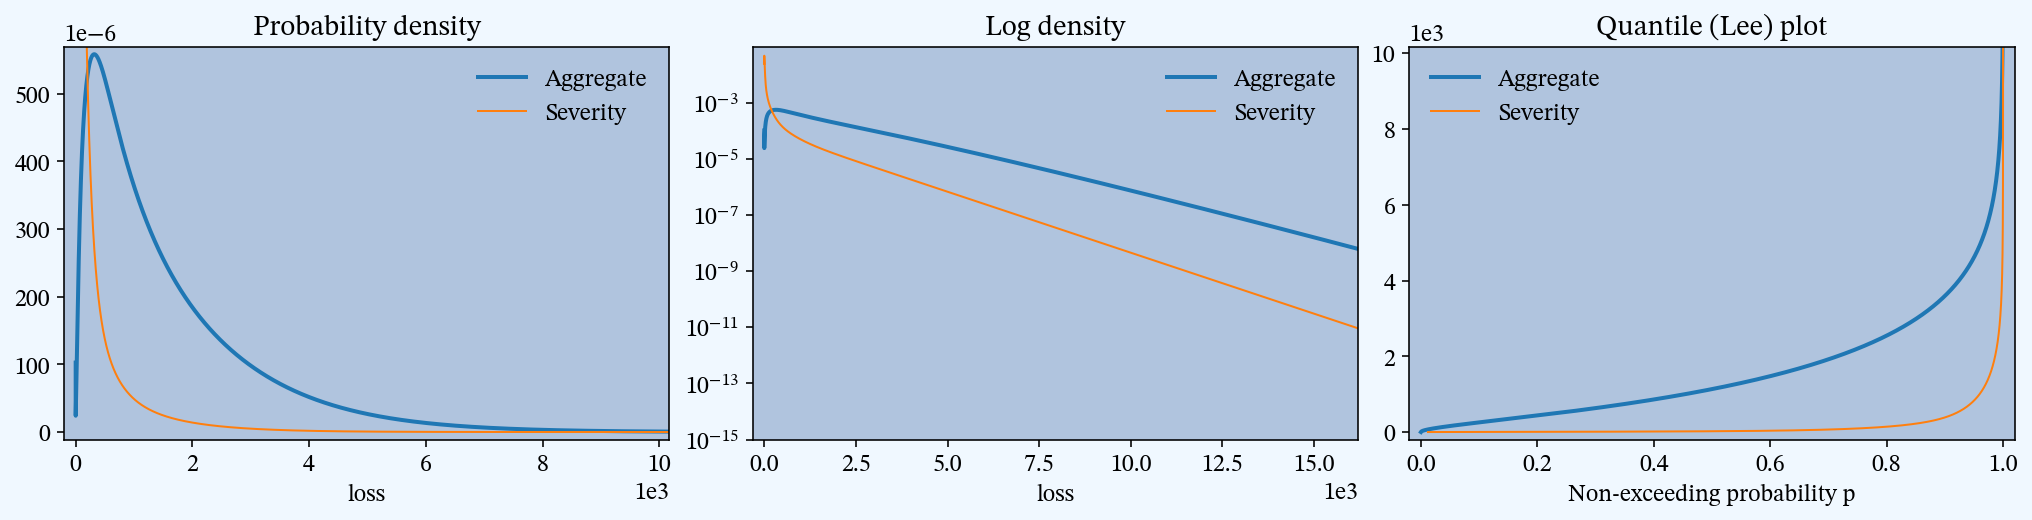

time: 1.51 s (started: 2022-10-18 16:17:08 +01:00)


In [10]:
a.plot()

In [11]:
port = catco.net

NameError: name 'catco' is not defined

time: 547 ms (started: 2022-10-18 16:17:24 +01:00)


In [32]:
port

,CAT,NC,total
"(freq, mean)",28.144,1.000,29.144
"(sev, mean)",44.264,26.340k,946.533
"(agg, mean)",1.246k,26.340k,27.586k
"(freq, cv)",442.189m,0.000,427.017m
"(sev, cv)",2.140,9.608m,5.058
"(agg, cv)",598.568m,9.608m,28.546m
"(freq, skew)",804.025m,NaN,804.025m
"(sev, skew)",34.464,74.000m,5.115
"(agg, skew)",2.758,74.000m,2.345
Mean,1.246k,26.340k,27.586k


time: 0 ns (started: 2022-07-12 21:33:22 -04:00)


In [34]:
sdir(port)

CAT                     EX_accounting_economic_balance_sheet    EX_allocated_capital_comparison EX_basic_loss_statistics
EX_distortion_calibration       EX_distortion_information       EX_loss_ratio_comparison        EX_margin_comparison
EX_multi_premium_capital        EX_natural_allocation_summary   EX_premium_capital
EX_return_on_allocated_capital_comparison       NC                      accounting_economic_balance_sheet       add_exa
agg_list                analysis_collateral     analysis_priority       analyze_distortion
analyze_distortion_add_comps    analyze_distortion_plots        analyze_distortions     apply_distortion
apply_distortions       approx_freq_ge          approx_type             as_severity             assets_2_epd
audit                   audit_df                audit_percentiles       audits                  augmented
augmented_df            basic_loss_statistics   best_bucket             biv_contour_plot        bs
calibrate_blends        calibrate_distortion    c

In [35]:
catco.pricing_summary

portfolio,gross,net
stat,,
L,27.586k,27.480k
M,907.932,725.699
P,28.493k,28.205k
LR,968.135m,974.271m
Q,10.682k,8.538k
ROE,85.000m,85.000m
a,39.175k,36.743k
PQ,2.668,3.304


time: 16 ms (started: 2022-07-12 21:34:22 -04:00)


In [38]:
port.dist_ans

time: 0 ns (started: 2022-07-12 21:35:39 -04:00)


In [37]:
port.distortion_information()

AttributeError: 'NoneType' object has no attribute 'reset_index'

time: 16 ms (started: 2022-07-12 21:35:18 -04:00)


In [36]:
port.distortion

blend (0.599099)

time: 16 ms (started: 2022-07-12 21:35:10 -04:00)


In [39]:
port.make_all(a=36743)

time: 31 ms (started: 2022-07-12 21:39:03 -04:00)


In [56]:
port.multi_premium_capital([34000, 35000, 36000])

time: 78 ms (started: 2022-07-12 21:56:43 -04:00)


In [57]:
port.EX_multi_premium_capital

Assets                      $a=34000.0$                     $a=35000.0$  \
Line                                CAT        NC     Total         CAT   
Item                                                                      
1. Allocated assets              6.665k   27.335k   34.000k      7.555k   
2. Market value liability        2.132k   26.030k   28.162k      2.148k   
3. Expected incurred loss        1.140k   26.340k   27.479k      1.140k   
4. Margin                       992.503  -309.462   683.041      1.008k   
5. Loss ratio                  534.525m     1.012  975.746m    530.643m   
6. Allocated equity              4.532k    1.305k    5.838k      5.407k   
7. Cost of allocated equity    218.982m -237.106m  117.009m    186.445m   
8. Premium to surplus ratio    470.449m    19.944     4.824    397.234m   

Assets                                          $a=36000.0$            \
Line                               NC     Total         CAT        NC   
Item                                                                    
1. Allocated assets           27.445k   35.000k      8.448k   27.552k   
2. Market value liability     26.032k   28.180k      2.164k   26.034k   
3. Expected incurred loss     26.340k   27.480k      1.140k   26.340k   
4. Margin                    -307.540   700.589      1.024k  -305.673   
5. Loss ratio                   1.012  975.139m    526.820m     1.012   
6. Allocated equity            1.413k    6.820k      6.285k    1.518k   
7. Cost of allocated equity -217.691m  102.728m    162.895m -201.410m   
8. Premium to surplus ratio    18.427     4.132    344.256m    17.154   

Assets                                 
Line                            Total  
Item                                   
1. Allocated assets           36.000k  
2. Market value liability     28.198k  
3. Expected incurred loss     27.480k  
4. Margin                     718.064  
5. Loss ratio                974.535m  
6. Allocated equity            7.802k  
7. Cost of allocated equity   92.032m  
8. Premium to surplus ratio     3.614

time: 16 ms (started: 2022-07-12 21:56:57 -04:00)


In [65]:
catco.gross._distortion = catco.gross.dists['ph']

time: 15 ms (started: 2022-07-12 22:03:22 -04:00)


In [62]:
catco.gross.EX_distortion_information

,Shape Parameter
Distortion,
Dual Moment,4.568
Proportional Hazard,466.397m
roe,85.000m
Tail VaR,695.210m
Wang-normal,976.838m


time: 0 ns (started: 2022-07-12 22:02:16 -04:00)


$x \wedge x$ $\bar Q(a)$

In [ ]:
  191:         port.profit_segment_plot(a, 0.999, ['total', 'Thick', 'Thin'],
  195:         port.natural_profit_segment_plot(a, 0.999, ['total', 'Thick', 'Thin'],


In [73]:
catco.gross.line_names

['NC', 'CAT']

time: 0 ns (started: 2022-07-12 22:15:34 -04:00)


In [85]:
catco.gross

,CAT,NC,total
"(freq, mean)",28.144,1.000,29.144
"(sev, mean)",44.264,26.340k,946.533
"(agg, mean)",1.246k,26.340k,27.586k
"(freq, cv)",442.189m,0.000,427.017m
"(sev, cv)",2.140,9.608m,5.058
"(agg, cv)",598.568m,9.608m,28.546m
"(freq, skew)",804.025m,NaN,804.025m
"(sev, skew)",34.464,74.000m,5.115
"(agg, skew)",2.758,74.000m,2.345
Mean,1.246k,26.340k,27.586k


time: 15 ms (started: 2022-07-12 22:28:40 -04:00)


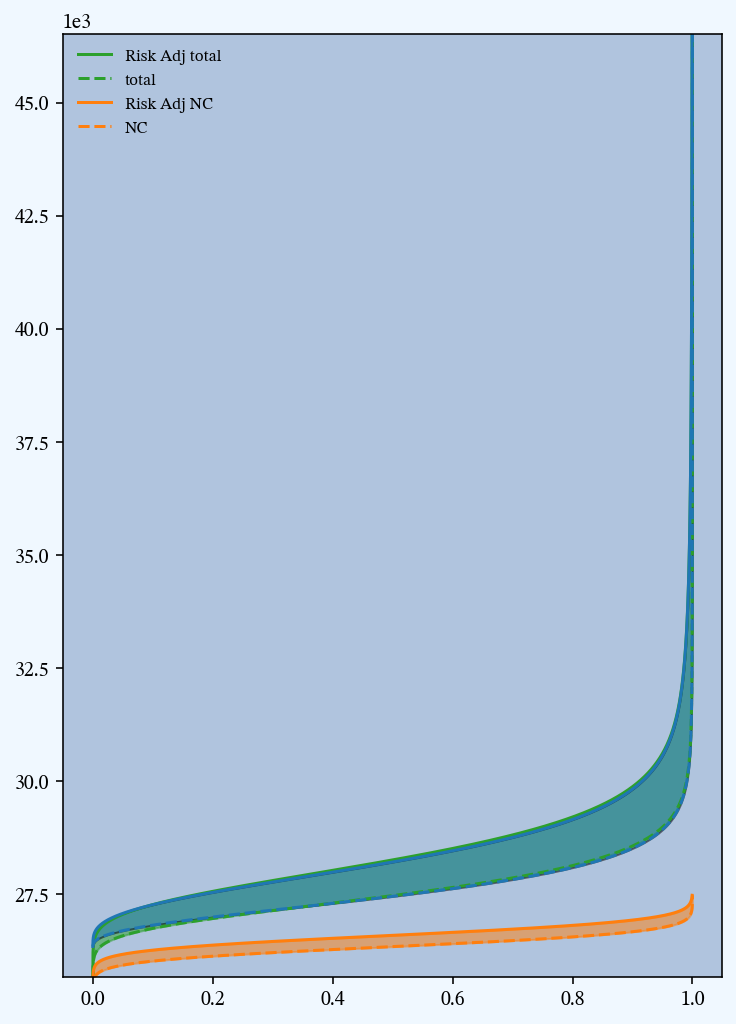

time: 297 ms (started: 2022-07-12 22:29:55 -04:00)


In [91]:
%%sf 1 1 5 7
catco.gross.profit_segment_plot(ax, 0.99999, ['total', 'CAT', 'NC'], 
                                'wang', [2,0,1], [0, 26340, 0])

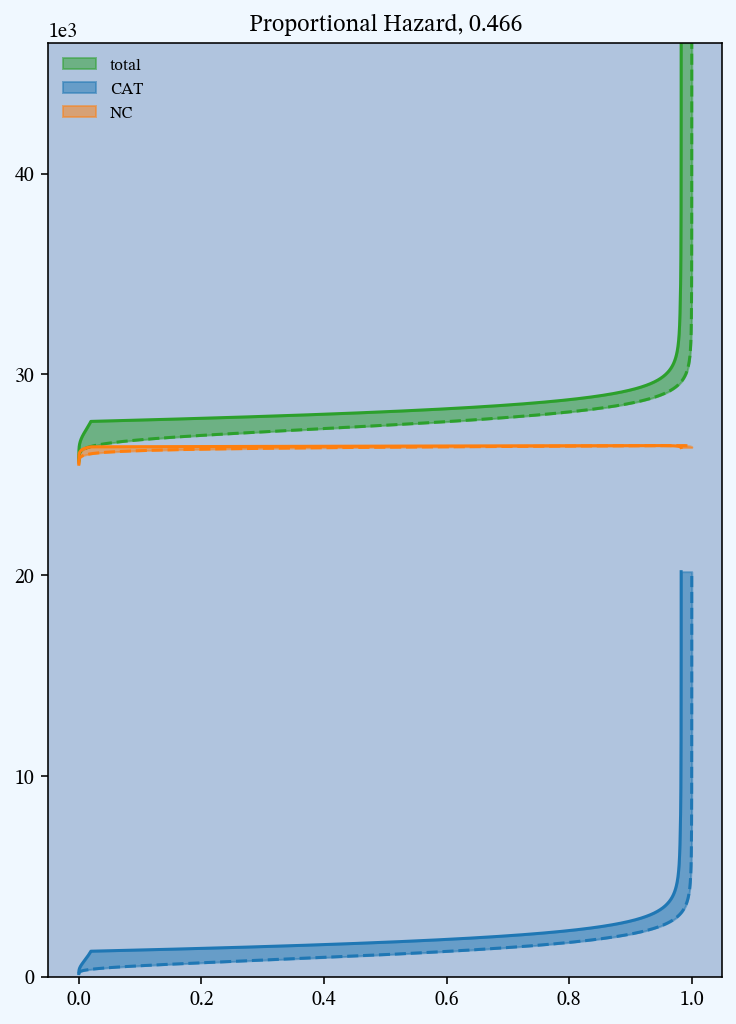

time: 547 ms (started: 2022-07-12 22:35:25 -04:00)


In [96]:
%%sf 1 1 5 7
catco.gross.natural_profit_segment_plot(ax, 0.99999, ['total', 'CAT', 'NC'], [2,0,1], [0, 0, 0])

In [97]:
catco.gross.report_df

unit,Nc,Cat,Total
statistic,,,
Freqency Mean,1.000,28.144,29.144
Freqency CV,0.000,0.442,0.427
Freqency Skewness,nan,0.804,0.804
Severity Mean,"26,340.000",44.264,946.533
Severity CV,0.010,2.140,5.058
Severity Skewness,0.074,34.464,5.115
Aggregate Mean,"26,340.000","1,245.760","27,585.760"
Aggregate emp Mean,"26,340.000","1,245.762","27,585.762"
Aggregate Mean err,-0.000,0.000,0.000


time: 15 ms (started: 2022-07-12 22:36:51 -04:00)


In [68]:
catco.gross.distortion_calibration()
catco.gross.EX_distortion_calibration

,a,LR,S(a),ι,δ,ν,EL(a),ρ(X ∧ a),Levg,𝑄¯ Q(a),ROE,Shape
Distortion,,,,,,,,,,,,
ph,39.175k,968.135m,49.999u,85.000m,78.341m,921.659m,27.586k,28.493k,2.668,10.682k,85.000m,466.397m


time: 16 ms (started: 2022-07-12 22:05:58 -04:00)


In [40]:
port.show_enhanced_exhibits()

,Statutory,Objective,Market,Difference
Item,,,,
Assets,36743,36743,36743,0
NC,1245.8,1139.8,2175.1,1035.3
CAT,26340,26340,26036,-304.31
Total,27586,27480,28211,731.02
Equity,9157.2,9263.3,8532.3,-731.02


,CAT,NC,Total
Mean,1245.759986,26340.000000,27585.759986
EmpMean,1139.916133,26340.000000,27479.916083
MeanErr,-0.084963,-0.000000,-0.003837
CV,0.598568,0.009608,0.028546
EmpCV,0.480062,0.009608,0.021940
CVErr,-0.197983,0.000001,-0.231403
Skew,2.758267,0.074000,2.344593
Kurt,193.352739,0.008216,126.147704
P99.0,2000.000000,26942.000000,28754.000000
P99.6,2262.000000,27030.000000,28928.000000


,CAT,NC,Total
Item,,,
1. Allocated assets,9113,27630,36743
2. Market value liability,2175.1,26036,28211
3. Expected incurred loss,1139.8,26340,27480
4. Margin,1035.3,-304.31,731.02
5. Loss ratio,0.52402,1.0117,0.97409
6. Allocated equity,6937.9,1594.5,8532.3
7. Cost of allocated equity,0.14923,-0.19085,0.085676
8. Premium to surplus ratio,0.31352,16.329,3.3063


time: 31 ms (started: 2022-07-12 21:39:53 -04:00)


In [70]:
port.report_df

unit,Nc,Cat,Total
statistic,,,
Freqency Mean,1.000,28.144,29.144
Freqency CV,0.000,0.442,0.427
Freqency Skewness,nan,0.804,0.804
Severity Mean,"26,340.000",44.264,946.533
Severity CV,0.010,2.140,5.058
Severity Skewness,0.074,34.464,5.115
Aggregate Mean,"26,340.000","1,245.760","27,585.760"
Aggregate emp Mean,"26,340.000","1,139.916","27,479.916"
Aggregate Mean err,-0.000,-0.085,-0.004


time: 16 ms (started: 2022-07-12 22:12:43 -04:00)


# LEX and YACCING

In [62]:
from sly import Lexer, Parser

class CalcLexer(Lexer):
    tokens = { NAME, NUMBER, PLUS, TIMES, MINUS, DIVIDE, ASSIGN, LPAREN, RPAREN }
    ignore = ' \t'

    # Tokens
    NAME = r'[a-zA-Z_][a-zA-Z0-9_]*'
    NUMBER = r'\d+'

    # Special symbols
    PLUS = r'\+'
    MINUS = r'-'
    TIMES = r'\*'
    DIVIDE = r'/'
    ASSIGN = r'='
    LPAREN = r'\('
    RPAREN = r'\)'

    # Ignored pattern
    ignore_newline = r'\n+'

    # Extra action for newlines
    def ignore_newline(self, t):
        self.lineno += t.value.count('\n')

    def error(self, t):
        print("Illegal character '%s'" % t.value[0])
        self.index += 1

time: 0 ns (started: 2022-10-20 13:25:02 +01:00)


In [63]:
class CalcParser(Parser):
    tokens = CalcLexer.tokens

    precedence = (
        ('left', PLUS, MINUS),
        ('left', TIMES, DIVIDE),
        ('right', UMINUS)
        )

    def __init__(self):
        self.names = { }

    @_('NAME ASSIGN expr')
    def statement(self, p):
        self.names[p.NAME] = p.expr

    @_('expr')
    def statement(self, p):
        print(p.expr)

    @_('expr PLUS expr')
    def expr(self, p):
        return p.expr0 + p.expr1

    @_('expr MINUS expr')
    def expr(self, p):
        return p.expr0 - p.expr1

    @_('expr TIMES expr')
    def expr(self, p):
        return p.expr0 * p.expr1

    @_('expr DIVIDE expr')
    def expr(self, p):
        return p.expr0 / p.expr1

    @_('MINUS expr %prec UMINUS')
    def expr(self, p):
        return -p.expr

    @_('LPAREN expr RPAREN')
    def expr(self, p):
        return p.expr

    @_('NUMBER')
    def expr(self, p):
        return int(p.NUMBER)

    @_('NAME')
    def expr(self, p):
        try:
            return self.names[p.NAME]
        except LookupError:
            print(f'Undefined name {p.NAME!r}')
            return 0

time: 0 ns (started: 2022-10-20 13:25:03 +01:00)


In [66]:
logger_level(30)
# run with no args this just loads libraries etc. 
%run -i snippets.py parse_builder

time: 15 ms (started: 2022-10-20 13:30:00 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
class UnderwritingLexer(Lexer):
    """
    Implements the Lexer for agg language.

    """

    tokens = {ID, BUILTIN_AGG, BUILTIN_SEV,NOTE,
              SEV, AGG, PORT,
              NUMBER, INFINITY,
              PLUS, MINUS, TIMES, DIVIDE, # SCALE_MULTIPLY, LOCATION_ADD,
              LOSS, PREMIUM, AT, LR, CLAIMS, # SPECIFIED,
              XS,
              CV, WEIGHTS, EQUAL_WEIGHT, XPS,
              MIXED, FREQ, EMPIRICAL, TWEEDIE,
              NET, OF, CEDED, TO, OCCURRENCE, AGGREGATE, PART_OF, SHARE_OF,
              AND,  PERCENT,
              EXPONENT, EXP,
              DFREQ, DSEV, RANGE
              }

    ignore = ' \t,\\|'
    literals = {'[', ']', '!', '(', ')'}

    # per manual, need to list longer tokens before shorter ones
    # simple but effective notes
    NOTE = r'note\{[^\}]*\}'  # r'[^\}]+'
    BUILTIN_AGG = r'agg\.[a-zA-Z][a-zA-Z0-9_:~]*'
    BUILTIN_SEV = r'sev\.[a-zA-Z][a-zA-Z0-9_:~]*'
    # PORT_BUILTIN = r'port\.[a-zA-Z][a-zA-Z0-9_:~]*'
    FREQ = r'binomial|poisson|bernoulli|pascal|geometric|fixed'

    # number regex including unary minus; need before MINUS else that grabs the minus sign in -3 etc.
    NUMBER = r'(\d+\.?\d*|\d*\.\d+)([eE](\+|\-)?\d+)?'
    # NUMBER = r'\-?(\d+\.?\d*|\d*\.\d+)([eE](\+|\-)?\d+)?'

    # do not allow _ in line names, use ~ or . or : instead: why: because p_ is used and _ is special
    # on honor system...really need two types of ID, it is OK in a portfolio name
    ID = r'[a-zA-Z][\.:~_a-zA-Z0-9]*'
    EXPONENT = r'\^|\*\*'
    PLUS = r'\+'
    MINUS = r'\-'
    TIMES = r'\*'
    DIVIDE = r'/'
    PERCENT = '%'
    # SCALE_MULTIPLY = r'@'
    # LOCATION_ADD = '#'
    EQUAL_WEIGHT = r'='
    RANGE = ':'

    ID['occurrence'] = OCCURRENCE
    ID['unlimited'] = INFINITY
    ID['aggregate'] = AGGREGATE

    ID['dfreq'] = DFREQ
    ID['dsev'] = DSEV

    # when using an empirical freq the claim count is specified
    # must use "specified claims" ... sets e_n = -1
    # ID['part'] = PART
    # ID['share'] = SHARE
    # ID['specified'] = SPECIFIED
    # constant severity... now just use dsev [n]
    # ID['constant'] = CONSTANT
    # nps freq specification
    ID['empirical'] = EMPIRICAL
    ID['tweedie'] = TWEEDIE
    ID['premium'] = PREMIUM
    ID['mixed'] = MIXED
    ID['unlim'] = INFINITY
    ID['claims'] = CLAIMS
    ID['ceded'] = CEDED
    ID['claim'] = CLAIMS
    ID['loss'] = LOSS
    ID['prem'] = PREMIUM
    ID['port'] = PORT
    ID['net'] = NET
    ID['sev'] = SEV
    ID['agg'] = AGG
    ID['nps'] = EMPIRICAL
    ID['xps'] = XPS
    ID['wts'] = WEIGHTS
    ID['inf'] = INFINITY
    ID['and'] = AND
    ID['exp'] = EXP
    ID['wt'] = WEIGHTS
    ID['at'] = AT
    ID['cv'] = CV
    ID['lr'] = LR
    ID['xs'] = XS
    ID['of'] = OF
    ID['to'] = TO
    ID['po'] = PART_OF
    ID['so'] = SHARE_OF
    ID['x'] = XS

    # number regex including unary minus; need before MINUS else that grabs the minus sign in -3 etc.
    # @_(r'\-?(\d+\.?\d*|\d*\.\d+)([eE](\+|\-)?\d+)?')
    # def NUMBER(self, t):
    #     return float(t.value)

    @_(r'\n+')
    def newline(self, t):
        self.lineno += t.value.count('\n')

    def error(self, t):
        print(f"Illegal character '{t.value[0]:s}'")
        self.index += 1

    @staticmethod
    def preprocess(program):
        """
        Separate preprocessor step, allowing it to be called separately.
        Preprocessing involves six steps:

        1. Remove // comments, through end of line
        2. Remove \\n in [ ] (vectors) that appear from  using ``f'{np.linspace(...)}'``
        3. Semicolon ; mapped to newline
        4. Backslash (line continuation) mapped to space
        5. \\n\\t is replaced with space, supporting the tabbed indented Portfolio layout
        6. Split on newlines

        :param program:
        :return:
        """

        # handle \n in vectors; first item is outside, then inside... (multidimensional??)
        out_in = re.split(r'\[|\]', program)
        assert len(out_in) % 2  # must be odd
        odd = [t.replace('\n', ' ') for t in out_in[1::2]]  # replace inside []
        even = out_in[0::2]  # otherwise pass through
        # reassemble
        program = ' '.join([even[0]] + [f'[{o}] {e}' for o, e in zip(odd, even[1:])])

        # remove comments C++-style // xxx (can't have comments with # used for location shift)
        # must replace comments before changing other \ns
        program = re.sub(r'//[^\n]*$', r'\n', program, flags=re.MULTILINE)

        #  preprocessing: line continuation; \n\t or \n____ to space (for port agg element indents),
        # ; to new line, split on new line
        program = program.replace('\\\n', ' '). replace('\n\t', ' ').replace('\n    ', ' ').replace(';', '\n')

        # split program into lines, only accept len > 0
        program = [i.strip() for i in program.split('\n') if len(i.strip()) > 0]
        return program

In [116]:
class UnderwritingParser(Parser):
    """
    Implements the Parser for agg language.

    """

    # uncomment to write detailed grammar rules
    debugfile = Path.home() / 'aggregate/parser/parser.out'
    tokens = UnderwritingLexer.tokens
    precedence = (
        # ('nonassoc', LOCATION_ADD),
        # ('nonassoc', SCALE_MULTIPLY),
        ('nonassoc', LOW),
        ('left', PLUS, MINUS),
        ('left', TIMES, DIVIDE),
        # ('right', UMINUS),
        ('right', EXP),
        ('right', EXPONENT),
        ('nonassoc', PERCENT),
    )

    def __init__(self, safe_lookup_function, debug=False):
        self.debug = debug
        self.out_dict = None
        self.reset()
        # instance of uw class to look up severities
        self.safe_lookup = safe_lookup_function

    def logger(self, msg, p):
        if self.debug is False:
            return
        logger.info(f'{msg:15s}')
        return
        nm = p._namemap
        sl = p._slice
        ans = []
        for k, v in nm.items():
            rhs = sl[v]
            if type(rhs) == sly.yacc.YaccSymbol:
                ans.append(f'{k}={rhs.value} (type: {rhs.type})')
            else:
                ans.append(f'{k}={rhs!s}')
        ans = "; ".join(ans)
        logger.info(f'{msg:15s}\n\t{ans}\n')

    def reset(self):
        # TODO Add sev_xs and sev_ps !!
        self.out_dict = {}

    @staticmethod
    def enhance_debugfile(f_out=''):
        """
        Put links in the parser.out debug file, if DEBUGFILE != ''

        :param f_out: Path or filename of output. If "" then DEBUGFILE.html used.
        :return:
        """

        if DEBUGFILE == '':
            return

        if f_out == '':
            f_out = DEBUGFILE.with_suffix('.html')
        else:
            f_out = Path(fn)

        txt = Path(DEBUGFILE).read_text(encoding='utf-8')
        txt = txt.replace('Grammar:\n', '<h1>Grammar:</h1>\n\n<pre>\n').replace('->', '<-')
        txt = re.sub(r'^Rule ([0-9]+)', r'<div id="rule_\1" />Rule \1', txt, flags=re.MULTILINE)
        txt = re.sub(r'^state ([0-9]+)$', r'<div id="state_\1" /><b>state \1</b>', txt, flags=re.MULTILINE)
        txt = re.sub(r'^    \(([0-9]+)\) ', r'    <a href="#rule_\1">Rule (\1)</a> ', txt, flags=re.MULTILINE)
        txt = re.sub(r'go to state ([0-9]+)', r'go to <a href="#state_\1">state (\1)</a>', txt, flags=re.MULTILINE)
        txt = re.sub(r'using rule ([0-9]+)', r'using <a href="#rule_\1">rule (\1)</a>', txt, flags=re.MULTILINE)
        txt = re.sub(r'in state ([0-9]+)', r'in <a href="#state_\1">state (\1)</a>', txt, flags=re.MULTILINE)

        f_out.write_text(txt + '\n</pre>', encoding='utf-8')

    @staticmethod
    def _check_vectorizable(value):
        """
        check the if value can be vectorized

        """
        if isinstance(value, float) or isinstance(value, int) or isinstance(value, np.ndarray):
            return value
        else:
            return np.array(value)

        
        
#     # final answer exit points ===================================
#     @_('sev_out')
#     def answer(self, p):
#         self.logger(
#             f'answer <-- sev_out, created severity {p.sev_out}', p)
#         return 'sev', p.sev_out

#     @_('agg_out')
#     def answer(self, p):
#         self.logger(
#             f'answer <-- agg_out, created aggregate {p.agg_out}', p)
#         return 'agg', p.agg_out

#     @_('port_out')
#     def answer(self, p):
#         self.logger(f'answer <-- port_out, created portfolio {p.port_out} '
#                     f'with {len(self.out_dict[("port", p.port_out)]["spec"])} aggregates', p)
#         return 'port', p.port_out

#     @_('expr')
#     def answer(self, p):
#         self.logger(f'answer <-- expr {p.expr} ', p)
#         return 'expr', p.expr

#     # building portfolios =======================================
#     @_('PORT name note agg_list')
#     def port_out(self, p):
#         self.logger(
#             f'port_out <-- PORT name note agg_list', p)
#         self.out_dict[("port", p.name)] = {'spec': p.agg_list, 'note': p.note}
#         # print([self.out_dict[('agg', i)] for i in p.agg_list])
#         return p.name

#     @_('agg_list agg_out')
#     def agg_list(self, p):
#         if p.agg_list is None:
#             raise ValueError('ODD agg list is empty')
#         p.agg_list.append(p.agg_out)
#         self.logger(f'agg_list <-- agg_list agg_out', p)
#         return p.agg_list

#     # building aggregates ========================================
#     @_('agg_out')
#     def agg_list(self, p):
#         self.logger(f'agg_list <-- agg_out', p)
#         return [p.agg_out]

#     @_('AGG name builtin_agg note')
#     def agg_out(self, p):
#         # for use when you change the agg and need a new name
#         self.logger(
#             f'agg_out <-- AGG name builtin_aggregate note', p)
#         self.out_dict[("agg", p.name)] = {
#             'name': p.name, **p.builtin_agg, 'note': p.note}
#         return p.name

#     # simplify agg out with sev_clause
#     @_('AGG name exposures layers sev_clause occ_reins freq agg_reins note')
#     def agg_out(self, p):
#         self.logger(
#             f'agg_out <-- AGG name exposures layers SEV sev occ_reins freq agg_reins note', p)
#         self.out_dict[("agg", p.name)] = {'name': p.name, **p.exposures, **p.layers, **p.sev_clause,
#                                          **p.occ_reins, **p.freq, **p.agg_reins, 'note': p.note}
#         return p.name


#     # simplify to??
#     @_('AGG name dfreq sev_clause occ_reins agg_reins note')
#     def agg_out(self, p):
#         self.logger(
#             f'agg_out <-- AGG name dfreq dsev occ_reins note', p)
#         self.out_dict[("agg", p.name)] = {'name': p.name, **p.dfreq, **p.sev_clause,
#                                          **p.occ_reins, **p.agg_reins, 'note': p.note}
#         return p.name


#     @_('AGG name TWEEDIE expr expr expr')
#     def agg_out(self, p):
#         self.logger('agg_out <-- AGG name TWEEDIE expr expr expr', p)
#         # Tweedie distribution in p, mean, sigma^2 format
#         # variance function is sigma^2 mean^p
#         # phi = sigma^2 in Jorgenson p. 127 notation
#         # p = (2 + a)/(a + 1) to a = (2 - p)/(p - 1)
#         # lambda = mu^(2-p) / ((2-p) sigma^2)
#         # beta = lambda alpha / mu
#         # see also tweedie_convert... should prob use that here...
#         pp = p[3]
#         mu = p[4]
#         sig2 = p[5]
#         alpha = (2 - pp) / (pp - 1)
#         lam = mu ** (2 - pp) / ((2 - pp) * sig2)
#         beta = lam * alpha / mu

#         dout = {'name': p.name, 'exp_en': lam, 'freq_name': 'poisson',
#                 'sev_name': 'gamma', 'sev_a': alpha, 'sev_scale': 1 / beta,
#                 'note': f'Tw(p={pp}, μ={mu}, σ^2={sig2}) --> CP(λ={lam:4f}, ga(α={alpha:.4f}, β={beta:.4f}), '
#                         f'scale={1/beta:.4f}'}
#         self.out_dict[('agg', p.name)] = dout

#     @_('builtin_agg agg_reins note')
#     def agg_out(self, p):
#         # no change to the built in agg, allows agg.A as a legitimate agg (called A)
#         self.logger(
#             f'agg_out <-- builtin_agg agg_reins note', p)
#         # print(p.builtin_agg)
#         self.out_dict[("agg", p.builtin_agg['name'])] = {**p.builtin_agg, **p.agg_reins, 'note': p.note}
#         return p.builtin_agg['name']

#     # building severities =====================================
#     @_('SEV name sev note')
#     def sev_out(self, p):
#         self.logger(
#             f'sev_out <-- sev name sev note ', p)
#         p.sev['name'] = p.name
#         p.sev['note'] = p.note
#         self.out_dict[("sev", p.name)] = p.sev
#         return p.name

#     @_('SEV name dsev note')
#     def sev_out(self, p):
#         self.logger(
#             f'sev_out <-- sev name dsev note ', p)
#         p.dsev['name'] = p.name
#         p.dsev['note'] = p.note
#         self.out_dict[("sev", p.name)] = p.dsev
#         return p.name

#     # frequency term ==========================================
#     # for all frequency distributions claim count is determined by exposure / severity
#     # EXCEPT for EMPIRICAL
#     # only freq shape parameters need be entered
#     # one and two parameter mixing distributions
#     # no mixing here, just expr
#     @_('MIXED ID expr expr')
#     def freq(self, p):
#         self.logger(
#             f'freq <-- MIXED ID expr expr', p)
#         return {'freq_name': p.ID, 'freq_a': p[2], 'freq_b': p[3]}

#     @_('MIXED ID expr')
#     def freq(self, p):
#         self.logger(
#             f'freq <-- MIXED ID expr', p)
#         return {'freq_name': p.ID, 'freq_a': p.expr}

#     @_('EMPIRICAL doutcomes dprobs')
#     def freq(self, p):
#         self.logger(f'freq <-- EMPIRICAL doutcomes dprobs', p)
#         # nps discrete given severity...
#         a = np.array(p.doutcomes, dtype=int)
#         if len(p.dprobs) == 0:
#             ps = np.ones_like(a) / len(a)
#         else:
#             ps = p.dprobs
#         return {'freq_name': 'empirical', 'freq_a': a, 'freq_b': ps}

#     @_('FREQ expr expr')
#     def freq(self, p):
#         self.logger(
#             f'freq <-- FREQ expr expr', p)
#         if p.FREQ != 'pascal':
#             logger.warn(
#                 f'Illogical choice of frequency {p.FREQ}, expected pascal')
#         return {'freq_name': p.FREQ, 'freq_a': p[1], 'freq_b': p[2]}

#     # binomial p or TODO inflated poisson
#     @_('FREQ expr')
#     def freq(self, p):
#         self.logger(
#             f'freq <-- FREQ expr', p)
#         if p.FREQ != 'binomial':
#             logger.warn(
#                 f'Illogical choice of frequency {p.FREQ}, expected binomial')
#         return {'freq_name': p.FREQ, 'freq_a': p.expr}

#     @_('FREQ')
#     def freq(self, p):
#         self.logger(
#             f'freq <-- FREQ (zero param distribution)', p)
#         if p.FREQ not in ('poisson', 'bernoulli', 'fixed', 'geometric'):
#             logger.error(
#                 f'Illogical choice for FREQ {p.FREQ}, should be poisson, bernoulli, geometric, or fixed')
#         return {'freq_name': p.FREQ}

#     # agg reins clause ========================================
#     @_('AGGREGATE NET OF reins_list')
#     def agg_reins(self, p):
#         self.logger(f'agg_reins <-- AGGREGATE NET OF reins_list', p)
#         return {'agg_reins': p.reins_list, 'agg_kind': 'net of'}

#     @_('AGGREGATE CEDED TO reins_list')
#     def agg_reins(self, p):
#         self.logger(f'agg_reins <--  AGGREGATE CEDED TO reins_list', p)
#         return {'agg_reins': p.reins_list, 'agg_kind': 'ceded to'}

#     @_("")
#     def agg_reins(self, p):
#         self.logger('agg_reins <-- missing agg reins', p)
#         return {}

#     # occ reins clause ========================================
#     @_('OCCURRENCE NET OF reins_list')
#     def occ_reins(self, p):
#         self.logger(f'occ_reins <-- OCCURRENCE NET OF reins_list', p)
#         return {'occ_reins': p.reins_list, 'occ_kind': 'net of'}

#     @_('OCCURRENCE CEDED TO reins_list')
#     def occ_reins(self, p):
#         self.logger(f'occ_reins <-- OCCURRENCE CEDED TO reins_list', p)
#         return {'occ_reins': p.reins_list, 'occ_kind': 'ceded to'}

#     @_("")
#     def occ_reins(self, p):
#         self.logger('occ_reins <-- missing occ reins', p)
#         return {}

#     # reinsurance clauses  ====================================
#     @_('reins_list AND reins_clause')
#     def reins_list(self, p):
#         self.logger(f'reins_list <-- reins_list AND reins_clause', p)
#         p.reins_list.append(p.reins_clause)
#         return p.reins_list

#     @_('reins_clause')
#     def reins_list(self, p):
#         self.logger(f'reins_list <-- reins_clause becomes reins_list', p)
#         return [p.reins_clause]

#     @_('expr XS expr')
#     def reins_clause(self, p):
#         self.logger(
#             f'reins_clause <-- expr XS expr {p[0]} po {p[0]} xs {p[2]}', p)
#         if np.isinf(p[0]):
#             return (1, p[0], p[2])
#         else:
#             # y p/o y xs a
#             return (p[0], p[0], p[2])

#     @_('expr SHARE_OF expr XS expr')
#     def reins_clause(self, p):
#         self.logger(
#             f'reins_clause <-- expr SHARE_OF expr XS expr {p[0]} s/o {p[2]} xs {p[4]}', p)
#         # here expr is the proportion...
#         if np.isinf(p[2]):
#             return (p[0], p[2], p[4])
#         else:
#             return (p[0] * p[2], p[2], p[4])

#     @_('expr PART_OF expr XS expr')
#     def reins_clause(self, p):
#         self.logger(
#             f'reins_clause <-- expr PART_OF expr XS expr {p[0]} p/o {p[2]} xs {p[4]}', p)
#         return (p[0], p[2], p[4])

#     # severity term ============================================
#     @_('SEV sev')
#     def sev_clause(self, p):
#         return p.sev

#     @_('dsev')
#     def sev_clause(self, p):
#         return p.dsev

#     @_('sev "!"')
#     def sev(self, p):
#         self.logger(f'sev <-- conditional flag set', p)
#         p.sev['sev_conditional'] = False
#         return p.sev

#     @_('sev PLUS numbers %prec LOCATION_ADD')
#     def sev(self, p):
#         # will need to use ugly sev LOCATION_ADD -number
#         self.logger(f'sev <-- sev PLUS numbers %prec', p)
#         p.sev['sev_loc'] = UnderwritingParser._check_vectorizable(
#             p.sev.get('sev_loc', 0))
#         p.numbers = UnderwritingParser._check_vectorizable(p.numbers)
#         p.sev['sev_loc'] += p.numbers
#         return p.sev

#     @_('sev MINUS numbers %prec LOCATION_ADD')
#     def sev(self, p):
#         # will need to use ugly sev LOCATION_ADD -number
#         self.logger(f'sev <-- sev MINUS numbers %prec', p)
#         p.sev['sev_loc'] = UnderwritingParser._check_vectorizable(
#             p.sev.get('sev_loc', 0))
#         p.numbers = UnderwritingParser._check_vectorizable(p.numbers)
#         p.sev['sev_loc'] -= p.numbers
#         return p.sev

#     @_('numbers TIMES sev %prec SCALE_MULTIPLY')
#     def sev(self, p):
#         self.logger(f'sev <-- numbers TIMES sev %prec', p)
#         p.numbers = UnderwritingParser._check_vectorizable(p.numbers)
#         if 'sev_mean' in p.sev:
#             p.sev['sev_mean'] = UnderwritingParser._check_vectorizable(
#                 p.sev.get('sev_mean', 0))
#             p.sev['sev_mean'] *= p.numbers
#         # only scale if there is a scale (otherwise you double count)
#         if 'sev_scale' in p.sev:
#             p.sev['sev_scale'] = UnderwritingParser._check_vectorizable(
#                 p.sev.get('sev_scale', 0))
#             p.sev['sev_scale'] *= p.numbers
#         if 'sev_mean' not in p.sev:
#             # e.g. Pareto has no mean and it is important to set the scale
#             # but if there is a mean it handles the scaling and setting scale will
#             # confuse the distribution maker
#             p.sev['sev_scale'] = p.numbers
#         # if there is a location it needs to scale too --- that's a curious choice!
#         if 'sev_loc' in p.sev:
#             p.sev['sev_loc'] = UnderwritingParser._check_vectorizable(
#                 p.sev['sev_loc'])
#             p.sev['sev_loc'] *= p.numbers
#         return p.sev

#     # @_('builtin_sev')
#     # def sev(self, p):
#     #     # allow sev.NAME to become a sev
#     #     self.logger('sev <-- builtin_sev', p)
#     #     if 'name' in p.builtin_sev:
#     #         # print('NAME IS HERE...', p.builtin_sev)
#     #         del p.builtin_sev['name']
#     #     else:
#     #         # print('WHY IS NAME NOT HERE?', p.builtin_sev)
#     #         pass
#     #     return p.builtin_sev

#     @_('ids numbers CV numbers weights')
#     def sev(self, p):
#         self.logger(
#             f'sev <-- ids numbers CV numbers weights', p)
#         return {'sev_name':  p.ids, 'sev_mean':  p[1], 'sev_cv':  p[3], 'sev_wt': p.weights}

#     @_('ids numbers weights')
#     def sev(self, p):
#         self.logger(
#             f'sev <-- ids numbers weights', p)
#         return {'sev_name': p.ids, 'sev_a':  p[1], 'sev_wt': p.weights}

#     @_('ids numbers numbers weights')
#     def sev(self, p):
#         self.logger(
#             f'sev <-- ids numbers numbers weights', p)
#         return {'sev_name': p.ids, 'sev_a': p[1], 'sev_b': p[2], 'sev_wt': p.weights}

#     # no weights with xps terms
#     @_('ids xps')
#     def sev(self, p):
#         self.logger(f'sev <-- ids xps (ids should be (c|d)histogram', p)
#         return {'sev_name': p.ids, **p.xps}

#     # @_('CONSTANT expr')
#     # def sev(self, p):
#     #     self.logger(f'sev <-- CONSTANT expr', p)
#     #     # syntactic sugar to specify a constant severity
#     #     return {'sev_name': 'dhistogram', 'sev_xs': [p.expr], 'sev_ps': [1]}

#     @_('XPS doutcomes dprobs')
#     def xps(self, p):
#         self.logger('xps <-- XPS doutcomes dprobs', p)
#         if len(p.dprobs) == 0:
#             ps = np.ones_like(p.doutcomes) / len(p.doutcomes)
#         else:
#             ps = p.dprobs
#         return {'sev_xs':  p.doutcomes, 'sev_ps':  ps}

#     @_('')
#     def xps(self, p):
#         self.logger('xps <-- missing xps term', p)
#         return {}

#     @_('DSEV doutcomes dprobs')
#     def dsev(self, p):
#         self.logger('dsev <-- DSEV doutcomes dprobs', p)
#         # need to check probs has been populated
#         if len(p.dprobs) == 0:
#             ps = np.ones_like(p.doutcomes) / len(p.doutcomes)
#         else:
#             ps = p.dprobs
#         return {'sev_name': 'dhistogram', 'sev_xs': p.doutcomes, 'sev_ps': ps}

#     @_('DFREQ doutcomes dprobs')
#     def dfreq(self, p):
#         self.logger('dfreq <-- DFREQ doutcomes dprobs', p)
#         # need to check probs has been populated
#         if len(p.dprobs) == 0:
#             b = np.ones_like(p.doutcomes) / len(p.doutcomes)
#         else:
#             b = p.dprobs
#         return {'freq_name': 'empirical', 'freq_a': p.doutcomes, 'freq_b': b, 'exp_en': -1}

#     # never valid for this to be a single number not in []
#     @_('"[" numberl "]"')
#     def doutcomes(self, p):
#         self.logger('doutcomes <-- [numberl]', p)
#         a = self._check_vectorizable(p.numberl)
#         return a

#     @_('"[" expr RANGE expr "]"')
#     def doutcomes(self, p):
#         self.logger('doutcomes <-- [expr : expr]', p)
#         return np.arange(p[1], p[3] + 1)

#     @_('"[" expr RANGE expr RANGE expr "]"')
#     def doutcomes(self, p):
#         self.logger('doutcomes <-- [expr : expr : expr]', p)
#         return np.arange(p[1], p[3] + 1, p[5])

#     @_('"[" numberl "]"')
#     def dprobs(self, p):
#         self.logger('dprobs <-- [numberl]', p)
#         a = self._check_vectorizable(p.numberl)
#         return a

#     @_('')
#     def dprobs(self, p):
#         self.logger('dprobs <-- missing dprobs term', p)
#         return []

#     @_('WEIGHTS EQUAL_WEIGHT expr')
#     def weights(self, p):
#         self.logger(
#             f'weights <-- WEIGHTS EQUAL_WEIGHTS expr ', p)
#         return np.ones(int(p.expr)) / p.expr

#     @_('WEIGHTS numbers')
#     def weights(self, p):
#         self.logger(f'weights <-- WEIGHTS numbers', p)
#         return p.numbers

#     @_('')
#     def weights(self, p):
#         self.logger('weights <-- missing weights term', p)
#         return 1

#     # layer terms, optional ===================================
#     @_('numbers XS numbers')
#     def layers(self, p):
#         self.logger(
#             f'layers <-- numbers XS numbers', p)
#         return {'exp_attachment': p[2], 'exp_limit': p[0]}

#     @_('')
#     def layers(self, p):
#         self.logger('layers <-- missing layer term', p)
#         return {}

#     # optional note  ==========================================
#     @_('NOTE')
#     def note(self, p):
#         self.logger(f'note <-- NOTE', p)
#         return p.NOTE[5:-1]

#     @_("")
#     def note(self, p):
#         self.logger("note <-- missing note term", p)
#         return ''

#     # exposures term ==========================================
#     # @_('SPECIFIED CLAIMS')
#     # def exposures(self, p):
#     #     self.logger(f'exposures <- SPECIFIED CLAIMS', p)
#     #     # a code that needs to be picked up later...
#     #     # ONLY for use with EMPIRICAL/EMPIRICAL claim distribution
#     #     # TO DO INTEGRATE CODE!
#     #     return {'exp_en': -1}

#     @_('numbers CLAIMS')
#     def exposures(self, p):
#         self.logger(f'exposures <-- numbers CLAIMS', p)
#         return {'exp_en': p.numbers}

#     @_('numbers LOSS')
#     def exposures(self, p):
#         self.logger(f'exposures <-- numbers LOSS', p)
#         return {'exp_el': p.numbers}

#     @_('numbers PREMIUM AT numbers LR')
#     def exposures(self, p):
#         self.logger(
#             f'exposures <-- numbers PREMIUM AT numbers LR', p)
#         return {'exp_premium': p[0], 'exp_lr': p[3], 'exp_el': np.array(p[0]) * np.array(p[3])}

#     @_('"[" idl "]"')
#     def ids(self, p):
#         self.logger(f'ids <-- [idl]', p)
#         return p.idl

#     @_('idl ID')
#     def idl(self, p):
#         s1 = f'idl <-- idl ID'
#         p.idl.append(p.ID)
#         s1 += f'{p.idl}'
#         self.logger(s1, p)
#         return p.idl

#     @_('ID')
#     def idl(self, p):
#         ans = [p.ID]
#         self.logger(f'idl <-- ID', p)
#         return ans

#     @_('ID')
#     def ids(self, p):
#         self.logger(f'ids <-- ID ({p.ID})', p)
#         return p.ID



    @_('numbers TIMES builtin_agg  ')
    def builtin_agg(self, p):
        """homogeneous change of scale """
        self.logger('builtin_agg <-- expr TIMES builtin_agg %prec', p)
        # bid = built_in_dict, want to be careful not to add scale too much
        bid = p.builtin_agg
        bid['name'] += '_homog_scaled'
        if 'sev_mean' in bid:
            bid['sev_mean'] = bid['sev_mean'] * p.expr
        if 'sev_scale' in bid:
            bid['sev_scale'] = bid['sev_scale'] * p.expr
        if 'sev_loc' in bid:
            bid['sev_loc'] = bid['sev_loc'] * p.expr
        bid['exp_attachment'] = bid.get('exp_attachment', 0) * p.expr
        bid['exp_limit'] = bid.get('exp_limit', np.inf) * p.expr
        bid['exp_el'] = bid.get('exp_el', 0) * p.expr
        bid['exp_premium'] = bid.get('exp_premium', 0) * p.expr
        return bid

    @_('builtin_agg PLUS numbers', 'builtin_agg MINUS numbers',)
    def builtin_agg(self, p):
        """
        translation
        :param p:
        :return:
        """
        # TODO FIXXXX
        self.logger('builtin_agg <-- builtin_agg PLUS expr %prec', p)
        # bid = built_in_dict, want to be careful not to add scale too much
        bid = p.builtin_agg
        bid['name'] += '_shifted'
        if 'sev_loc' in bid:
            bid['sev_loc'] += p.expr
        else:
            bid['sev_loc'] = p.expr
        return bid

    @_('BUILTIN_AGG')
    def builtin_agg(self, p):
        # ensure lookup only happens here
        self.logger(f'builtin_agg <-- AGG_BUILTIN', p)
        built_in_dict = self.safe_lookup(p.BUILTIN_AGG)
        return built_in_dict

    @_('BUILTIN_SEV')
    def sev(self, p):
        # ensure lookup only happens here
        # unlike aggs, will never just say sev.A
        # but, can allow  agg A 1 claim sev.B and for that need to distinguish from a sev
        self.logger(f'sev <-- BUILTIN_SEV ({p.BUILTIN_SEV})', p)
        built_in_dict = self.safe_lookup(p.BUILTIN_SEV)
        if 'name' in built_in_dict:
            del built_in_dict['name']
        return built_in_dict


#     # ids =========================================================
    @_('ID')
    def name(self, p):
        self.logger(f'name <-- ID = {p.ID}', p)
        return p.ID

    # vectors of numbers
    @_('"[" numberl "]"')
    def numbers(self, p):
        self.logger(f'numbers <-- [numberl]', p)
        return p.numberl

    @_('numberl expr')
    def numberl(self, p):
        self.logger(
            f'numberl <-- numberl expr (adding {p.expr} to list {p.numberl})', p)
        p.numberl.append(p.expr)
        return p.numberl

    @_('expr')
    def numberl(self, p):
        self.logger(f'numberl <-- expr', p)
        ans = [p.expr]
        return ans

    @_('expr')
    def numbers(self, p):
        self.logger('numbers <-- expr', p)
        return p.expr

    @_('sum PLUS term')
    def sum(self, p):
        self.logger('term <-- sum + sum', p)
        return p.sum + p.term

    @_('sum MINUS term')
    def sum(self, p):
        self.logger('term <-- sum - sum', p)
        return p.sum - p.term

    @_('sum %prec LOW')
    def expr(self, p):
        return p.sum


    @_('term %prec LOW')
    def sum(self, p):
        self.logger('term <-- sum', p)
        return p.term

    @_('term TIMES factor')
    def term(self, p):
        self.logger('expr <-- expr * expr', p)
        return p.term * p.factor

    @_('term DIVIDE factor')
    def term(self, p):
        self.logger('expr <-- expr / expr', p)
        return p.term / p.factor

    @_('factor')
    def term(self, p):
        return p.factor

    @_('PLUS factor', 'MINUS factor')
    def factor(self, p):
        self.logger('factor <-- + or minus factor', p)
        if p[0] == '+':
            return p.factor
        else:
            return -p.factor

    @_('power')
    def factor(self, p):
        self.logger('factor <-- power', p)
        return p.power

    @_('atom EXPONENT factor')
    def power(self, p):
        self.logger('power <-- atom EXPONENT factor', p)
        return p.atom ** p.factor

    @_('atom')
    def power(self, p):
        self.logger('power <-- atom', p)
        return p.atom

    @_('NUMBER PERCENT')
    def atom(self, p):
        self.logger('atom <-- atom PERCENT', p)
        return p.NUMBER / 100

    @_('INFINITY')
    def atom(self, p):
        self.logger(f'atom <-- INFINITY', p)
        return np.inf

    @_('NUMBER')
    def atom(self, p):
        # number regex includes -1 automatically so no need for a UMINUS parse
        self.logger(f'atom <-- NUMBER, {p.NUMBER}', p)
        # if p.NUMBER in ('inf', 'unlimited', 'unlim'):
        #     t = np.inf
        # else:
        t = float(p.NUMBER)
        return t

    @_('"(" sum ")"')
    def factor(self, p):
        return p.sum
    #
    @_('EXP "(" sum ")"')
    def factor(self, p):
        return exp(p.sum)

    def error(self, p):
        if p:
            raise ValueError(p)
        else:
            raise ValueError('Unexpected end of file')

time: 31 ms (started: 2022-10-20 14:36:31 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
state 3

    (6) expr -> sum .
    (4) sum -> sum . MINUS term
    (5) sum -> sum . PLUS term
    EXP             reduce using rule 6 (expr -> sum .)
    (               reduce using rule 6 (expr -> sum .)
    NUMBER          reduce using rule 6 (expr -> sum .)
    INFINITY        reduce using rule 6 (expr -> sum .)
    $end            reduce using rule 6 (expr -> sum .)
    MINUS           shift and go to state 15
    PLUS            shift and go to state 16
